# Telecom Churn - Group Case Study




## Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# IMPORT AND INSPECT DATA

In [2]:
telecom_df = pd.read_csv("telecom_churn_data.csv") #create df by reading data 
telecom_df.head() #displays first 5 lines of code

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom_df.shape

(99999, 226)

#### There are about 226 features describing the customer data and 99999 unique customer data

In [4]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# DATA CLEANING

###  IMPUTING MISSING VALUES

In [5]:
#function to calculate null value and percebtage of null

def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [6]:
nul_val=find_NaN(telecom_df)
nul_val

,Cnt_of_Nulls,Null_Percentage
mobile_number,0,0.00000
circle_id,0,0.00000
loc_og_t2o_mou,1018,1.01801
std_og_t2o_mou,1018,1.01801
loc_ic_t2o_mou,1018,1.01801
...,...,...
aon,0,0.00000
aug_vbc_3g,0,0.00000
jul_vbc_3g,0,0.00000
jun_vbc_3g,0,0.00000


In [7]:
nul_val[nul_val.Cnt_of_Nulls>0]#display columns with null values

,Cnt_of_Nulls,Null_Percentage
loc_og_t2o_mou,1018,1.018010
std_og_t2o_mou,1018,1.018010
loc_ic_t2o_mou,1018,1.018010
last_date_of_month_7,601,0.601006
last_date_of_month_8,1100,1.100011
...,...,...
night_pck_user_9,74077,74.077741
fb_user_6,74846,74.846748
fb_user_7,74428,74.428744
fb_user_8,73660,73.660737


In [8]:
nul_val[nul_val.Null_Percentage>50]#checking cols with more than 50% null

,Cnt_of_Nulls,Null_Percentage
date_of_last_rech_data_6,74846,74.846748
date_of_last_rech_data_7,74428,74.428744
date_of_last_rech_data_8,73660,73.660737
date_of_last_rech_data_9,74077,74.077741
total_rech_data_6,74846,74.846748
total_rech_data_7,74428,74.428744
total_rech_data_8,73660,73.660737
total_rech_data_9,74077,74.077741
max_rech_data_6,74846,74.846748
max_rech_data_7,74428,74.428744


In [9]:
nul_val[nul_val.Null_Percentage>50].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

#### Of the above columns, there are a few columns where a missing value would mean there was no data, hence we can impute it with ), rather than mean or median.
#### For example, the NA in recharge columns would mean no recharge was done, hence we can impute with 0

In [10]:
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']

In [11]:
for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeCol]:
    telecom_df[col].fillna(0, inplace=True)

In [12]:
nul_val=find_NaN(telecom_df)
nul_val

,Cnt_of_Nulls,Null_Percentage
mobile_number,0,0.00000
circle_id,0,0.00000
loc_og_t2o_mou,1018,1.01801
std_og_t2o_mou,1018,1.01801
loc_ic_t2o_mou,1018,1.01801
...,...,...
aon,0,0.00000
aug_vbc_3g,0,0.00000
jul_vbc_3g,0,0.00000
jun_vbc_3g,0,0.00000


In [13]:
nul_val[nul_val.Null_Percentage>0]#checking cols with null vals

,Cnt_of_Nulls,Null_Percentage
loc_og_t2o_mou,1018,1.018010
std_og_t2o_mou,1018,1.018010
loc_ic_t2o_mou,1018,1.018010
last_date_of_month_7,601,0.601006
last_date_of_month_8,1100,1.100011
...,...,...
date_of_last_rech_9,4760,4.760048
date_of_last_rech_data_6,74846,74.846748
date_of_last_rech_data_7,74428,74.428744
date_of_last_rech_data_8,73660,73.660737


In [14]:
nul_val[nul_val.Null_Percentage>50]#checking cols with more than 50% null

,Cnt_of_Nulls,Null_Percentage
date_of_last_rech_data_6,74846,74.846748
date_of_last_rech_data_7,74428,74.428744
date_of_last_rech_data_8,73660,73.660737
date_of_last_rech_data_9,74077,74.077741


In [15]:
# Dropping the columns from the dataframe with null percentange 50 or more

telecom_df.drop(nul_val[nul_val.Null_Percentage>50].index, inplace=True, axis=1)
telecom_df.shape

(99999, 222)

In [16]:
nul_val=find_NaN(telecom_df) #find nul vals

In [17]:
nul_val[nul_val.Null_Percentage>7] #nullvlues >7%

,Cnt_of_Nulls,Null_Percentage
onnet_mou_9,7745,7.745077
offnet_mou_9,7745,7.745077
roam_ic_mou_9,7745,7.745077
roam_og_mou_9,7745,7.745077
loc_og_t2t_mou_9,7745,7.745077
loc_og_t2m_mou_9,7745,7.745077
loc_og_t2f_mou_9,7745,7.745077
loc_og_t2c_mou_9,7745,7.745077
loc_og_mou_9,7745,7.745077
std_og_t2t_mou_9,7745,7.745077


#### Looks like for Month 9, there are missing data for the above column, with each column having 7.745% missing value 

In [18]:

# checking if all these above features go missing together since they have the same 8% missing values in each feature.

telecom_df[telecom_df[list(nul_val[nul_val.Null_Percentage>7].index)].isnull().all(axis=1)][list(nul_val[nul_val.Null_Percentage>7].index)].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### we can impute the above rows with 0, as all the columns of the row is NA

In [19]:
#replace NAN with 0 for cols with more than 7% null
for col in list(nul_val[nul_val.Null_Percentage>7].index):
            telecom_df[col].fillna(0, inplace=True)

In [20]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>7] #check null for > 7%

,Cnt_of_Nulls,Null_Percentage


In [21]:
nul_val[nul_val.Null_Percentage>1] #> 1% nulls

,Cnt_of_Nulls,Null_Percentage
loc_og_t2o_mou,1018,1.018010
std_og_t2o_mou,1018,1.018010
loc_ic_t2o_mou,1018,1.018010
last_date_of_month_8,1100,1.100011
last_date_of_month_9,1659,1.659017
...,...,...
ic_others_8,5378,5.378054
date_of_last_rech_6,1607,1.607016
date_of_last_rech_7,1767,1.767018
date_of_last_rech_8,3622,3.622036


In [22]:
nul_val[nul_val.Null_Percentage>2]

,Cnt_of_Nulls,Null_Percentage
onnet_mou_6,3937,3.937039
onnet_mou_7,3859,3.859039
onnet_mou_8,5378,5.378054
offnet_mou_6,3937,3.937039
offnet_mou_7,3859,3.859039
...,...,...
ic_others_6,3937,3.937039
ic_others_7,3859,3.859039
ic_others_8,5378,5.378054
date_of_last_rech_8,3622,3.622036


In [23]:
#check rows of null %>2
telecom_df[telecom_df[list(nul_val[nul_val.Null_Percentage>2].index)].isnull().all(axis=1)][list(nul_val[nul_val.Null_Percentage>2].index)].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### There are a few customer with nullValues across all the columns with more than 2% missing values, lets drop these rows

In [24]:
#drop col with null % >2
telecom_df=telecom_df[~telecom_df[list(nul_val[nul_val.Null_Percentage>2].index)].isnull().all(axis=1)]
telecom_df.shape

(99618, 222)

In [25]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>0] #cols with null

,Cnt_of_Nulls,Null_Percentage
loc_og_t2o_mou,637,0.639443
std_og_t2o_mou,637,0.639443
loc_ic_t2o_mou,637,0.639443
last_date_of_month_7,318,0.319219
last_date_of_month_8,751,0.753880
...,...,...
ic_others_8,4997,5.016162
date_of_last_rech_6,1482,1.487683
date_of_last_rech_7,1461,1.466602
date_of_last_rech_8,3241,3.253428


#### There are still 97 columns which have missing values. lets impute them

#### But before imputing, let us identify the categorical and Continous data from the 214 numeric columns

In [26]:
c=list(telecom_df.select_dtypes(exclude=object).columns) #selecting only columns with non object data type

In [27]:
## Creating function to identify the categorical variables 
## using logic that categorical values would have few unique values, we will consider 10 unique values
cat=[]
def cat_col(na):
    for i in na:
        if len(telecom_df[i].unique())<=10:
            cat.append(i)
    return cat

In [28]:
cat_col(c)#func call

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

####  lets check the Unique values for the categorical columns and take actions

In [29]:
for i in cat:
    print("Unique values in column %s are %s" % (i,telecom_df[i].unique())) #check the unique values 

Unique values in column circle_id are [109]
Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column std_og_t2c_mou_6 are [nan  0.]
Unique values in column std_og_t2c_mou_7 are [nan  0.]
Unique values in column std_og_t2c_mou_8 are [ 0. nan]
Unique values in column std_og_t2c_mou_9 are [0.]
Unique values in column std_ic_t2o_mou_6 are [nan  0.]
Unique values in column std_ic_t2o_mou_7 are [nan  0.]
Unique values in column std_ic_t2o_mou_8 are [ 0. nan]
Unique values in column std_ic_t2o_mou_9 are [0.]
Unique values in column night_pck_user_6 are [0. 1.]
Unique values in column night_pck_user_7 are [0. 1.]
Unique values in column night_pck_user_8 are [0. 1.]
Unique values in column night_pck_user_9 are [0. 1.]
Unique values in column monthly_2g_6 are [0 1 2 3 4]
Unique values in column monthly_2g_7 are [0 1 2 5 4 3]
Unique values in column monthly_2g_8 are [0 1 2

In [30]:
#Some of the above features take only one value that is 0, let us impute the missing values for these with 0.
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
for c in col:
    telecom_df[c].fillna(0, inplace=True)


In [31]:
# recheck

for i in cat:
    print("Unique values in column %s are %s" % (i,telecom_df[i].unique()))

Unique values in column circle_id are [109]
Unique values in column loc_og_t2o_mou are [0.]
Unique values in column std_og_t2o_mou are [0.]
Unique values in column loc_ic_t2o_mou are [0.]
Unique values in column std_og_t2c_mou_6 are [0.]
Unique values in column std_og_t2c_mou_7 are [0.]
Unique values in column std_og_t2c_mou_8 are [0.]
Unique values in column std_og_t2c_mou_9 are [0.]
Unique values in column std_ic_t2o_mou_6 are [0.]
Unique values in column std_ic_t2o_mou_7 are [0.]
Unique values in column std_ic_t2o_mou_8 are [0.]
Unique values in column std_ic_t2o_mou_9 are [0.]
Unique values in column night_pck_user_6 are [0. 1.]
Unique values in column night_pck_user_7 are [0. 1.]
Unique values in column night_pck_user_8 are [0. 1.]
Unique values in column night_pck_user_9 are [0. 1.]
Unique values in column monthly_2g_6 are [0 1 2 3 4]
Unique values in column monthly_2g_7 are [0 1 2 5 4 3]
Unique values in column monthly_2g_8 are [0 1 2 5 3 4]
Unique values in column monthly_2g_9 

#### Now let us go ahead and impute the missing values 

In [32]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>0] #columns with null

,Cnt_of_Nulls,Null_Percentage
last_date_of_month_7,318,0.319219
last_date_of_month_8,751,0.753880
last_date_of_month_9,1297,1.301974
onnet_mou_6,3556,3.569636
onnet_mou_7,3478,3.491337
...,...,...
ic_others_8,4997,5.016162
date_of_last_rech_6,1482,1.487683
date_of_last_rech_7,1461,1.466602
date_of_last_rech_8,3241,3.253428


In [33]:
#making a list of columns with null
na=list(nul_val[nul_val.Null_Percentage>0].index)


In [34]:
c=list(telecom_df[na].select_dtypes(include=object).columns) #selecting only columns with object data type

In [35]:
c #columns with null value and which are categorical

['last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [36]:
#let us replace these columns with mode value
# impute missing values with mode for catergorical data
for i in c:
    telecom_df[i] = telecom_df[i].fillna(telecom_df[i]).mode()[0]

In [37]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>0] #columns with null
num=list(nul_val[nul_val.Null_Percentage>0].index)


In [38]:
#let us replace these columns with median value
# impute missing values with mode for numerical data
for i in num:
    telecom_df[i].fillna(telecom_df[i].median(), inplace=True)

In [39]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>0] #columns with null

,Cnt_of_Nulls,Null_Percentage


### There are no null values

In [40]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99618 entries, 0 to 99998
Columns: 222 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(8)
memory usage: 169.5+ MB


In [41]:
col=list(telecom_df.columns)
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

# GETTING HIGH-VALUE CUSTOMERS 
### (BASED ON PARETO RULE OR 80-20 RULE)


In [42]:

# calculate the total data recharge amount for June and July (good phase)
# total data rech=number of recharges * average recharge amount
telecom_df['total_data_rech_6'] = telecom_df.total_rech_data_6 * telecom_df.av_rech_amt_data_6
telecom_df['total_data_rech_7'] = telecom_df.total_rech_data_7 * telecom_df.av_rech_amt_data_7

In [43]:
# calculate overal total recharge amount 
# total recharge=call recharge amount + data recharge amount
telecom_df['total_rech_6'] = telecom_df.total_rech_amt_6 + telecom_df.total_data_rech_6
telecom_df['total_rech_7'] = telecom_df.total_rech_amt_7 + telecom_df.total_data_rech_7

In [44]:
# calculate average recharge done by customer in June and July
#average recharge=total recharge june + total recharge july/2
telecom_df['av_rech_amt_6_7'] = (telecom_df.total_rech_6 + telecom_df.total_rech_7)/2

In [45]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile is {0}".format(telecom_df.av_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile is 479.5


#### We would filter out the top 30% customer as high value customer, there customers would have av_rech_amt_6_7>= 70% percentile of av_rech_amt_6_7


In [46]:
# retain  customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_HVC = telecom_df.loc[telecom_df.av_rech_amt_6_7 >= telecom_df.av_rech_amt_6_7.quantile(0.7), :]
telecom_HVC = telecom_HVC.reset_index(drop=True)
telecom_HVC.shape

(29906, 227)

In [47]:
# drop columns created to filter high-value customers
telecom_HVC = telecom_HVC.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'total_rech_6', 'total_rech_7', 'av_rech_amt_6_7'], axis=1)
telecom_HVC.shape

(29906, 222)

#### We're left with 29906 rows and 222 columns

_________________________________________________________________________________

# DERIVE CHURN
#### 9TH MONTH IS CONSIDERED AS CHURN PERIOD, WE WILL USE USUAGE BASED CHURN TECHNIQUE  

In [48]:
#claculate total call activity
telecom_HVC['total_calls_mou_9'] = telecom_HVC.total_ic_mou_9 + telecom_HVC.total_og_mou_9

# calculate total data consumption
telecom_HVC['total_internet_mb_9'] =  telecom_HVC.vol_2g_mb_9 + telecom_HVC.vol_3g_mb_9

In [49]:
# create churn variable: those who have neither have any calls nor internet used

# 0 - not churn, 1 - churn
telecom_HVC['churn'] = telecom_HVC.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [50]:
telecom_HVC.churn.value_counts()*100/telecom_HVC.shape[0]

0    91.914666
1     8.085334
Name: churn, dtype: float64

##### There is a high imblance in data, we will use balancing techniques later 

In [51]:
# we no longer require columns for september month, hence we shall delete them

drop_9_columns = telecom_HVC.filter(regex='_9') #cols with _9 in them
telecom_HVC.drop(list(drop_9_columns.columns),axis=1,inplace=True) #drop cols

In [52]:
telecom_HVC.aon.describe()

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64

In [53]:
telecom_HVC['Age_group']=pd.qcut(telecom_HVC['aon'], q=10) #create new column for agegroup 

In [54]:
telecom_HVC['Age_group']

0         (846.0, 1103.0]
1          (658.0, 846.0]
2          (284.0, 394.0]
3          (658.0, 846.0]
4          (495.0, 658.0]
               ...       
29901      (394.0, 495.0]
29902      (658.0, 846.0]
29903    (2202.0, 2792.5]
29904      (284.0, 394.0]
29905      (394.0, 495.0]
Name: Age_group, Length: 29906, dtype: category
Categories (10, interval[float64]): [(179.999, 284.0] < (284.0, 394.0] < (394.0, 495.0] < (495.0, 658.0] ... (1103.0, 1473.5] < (1473.5, 2202.0] < (2202.0, 2792.5] < (2792.5, 4321.0]]

In [55]:
telecom_HVC

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Age_group
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,"(846.0, 1103.0]"
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1,"(658.0, 846.0]"
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0,"(284.0, 394.0]"
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0,"(658.0, 846.0]"
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,0.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0,"(495.0, 658.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29901,7000630859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,384.316,255.405,...,1.0,1.0,1.0,473,1100.43,619.59,668.05,0.33,0,"(394.0, 495.0]"
29902,7000661676,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,328.594,202.966,...,1.0,1.0,1.0,820,0.00,0.00,0.00,0.00,0,"(658.0, 846.0]"
29903,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,644.973,455.228,...,1.0,1.0,1.0,2696,497.45,598.67,604.08,0.00,0,"(2202.0, 2792.5]"
29904,7002111859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,312.558,512.932,...,0.0,1.0,1.0,328,104.73,0.00,0.00,0.00,0,"(284.0, 394.0]"


#### Data now has 170 columns and 29906 row

# DERIVE NEW FEATURES 

### Calculate difference between 8th and previous months (6th and 7th)

#### Let's derive some variables. The most important feature, in this situation, can be the difference between the usage (8th month) and good phase (6th and 7th month)

In [56]:
telecom_HVC['total_rech_num_diff'] = telecom_HVC.total_rech_num_8 - ((telecom_HVC.total_rech_num_6 + telecom_HVC.total_rech_num_7)/2)

telecom_HVC['total_rech_amt_diff'] = telecom_HVC.total_rech_amt_8 - ((telecom_HVC.total_rech_amt_6 + telecom_HVC.total_rech_amt_7)/2)

telecom_HVC['max_rech_amt_diff'] = telecom_HVC.max_rech_amt_8 - ((telecom_HVC.max_rech_amt_6 + telecom_HVC.max_rech_amt_7)/2)

telecom_HVC['total_rech_data_diff'] = telecom_HVC.total_rech_data_8 - ((telecom_HVC.total_rech_data_6 + telecom_HVC.total_rech_data_7)/2)

telecom_HVC['max_rech_data_diff'] = telecom_HVC.max_rech_data_8 - ((telecom_HVC.max_rech_data_6 + telecom_HVC.max_rech_data_7)/2)

telecom_HVC['av_rech_amt_data_diff'] = telecom_HVC.av_rech_amt_data_8 - ((telecom_HVC.av_rech_amt_data_6 + telecom_HVC.av_rech_amt_data_7)/2)

telecom_HVC['vol_2g_mb_diff'] = telecom_HVC.vol_2g_mb_8 - ((telecom_HVC.vol_2g_mb_6 + telecom_HVC.vol_2g_mb_7)/2)

telecom_HVC['vol_3g_mb_diff'] = telecom_HVC.vol_3g_mb_8 - ((telecom_HVC.vol_3g_mb_6 + telecom_HVC.vol_3g_mb_7)/2)

In [57]:
telecom_HVC.shape

(29906, 179)

In [58]:
### CREATING FUNCTIONS FOR GRAPHS

# Creating a function for annotation of bar graphs- Horizontal

def ann_h(df):
   
    totals = []

    # find the values and append to list
    for i in df.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in df.patches:
        # get_x pulls left or right; get_height pushes up or down
        df.text(i.get_x()+.29, i.get_height(), \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        
#count plot functionn
        
def cnt(df,col):    
    for i in col:
        plt.figure(figsize = (30,15)) 
        p=sns.countplot(df[i]) #ploting for varibales
        ann_h(p)
        plt.xticks(rotation=90, fontsize=20)
        plt.xlabel(i, fontsize=20)
        plt.ylabel('Count', fontsize=0)
        plt.yticks(fontsize=20)
        plt.show()
        
#Pie plot function
        
def pi(df,col):    
    for i in col:
        plt.figure(figsize = (3,3)) 
        df[i].value_counts(normalize= True).plot.pie(autopct='%1.1f%%') #ploting pie plots
        plt.show()
 

# boxplot function

def box_plot(df,col):
    plt.figure(figsize=(20, 15))
    for i in enumerate(col):
        plt.subplot(3,3,i[0]+1)
        sns.boxplot(x = i[1], data =df)
        
        
#plotting spread of  columnn with coverted 

def cnt_con(col,df):
        for i in col:
            plt.figure(figsize = (30,15)) 
            sns.countplot(df[i],hue=df['Converted']) #ploting for varibales
            plt.xticks(rotation=90, fontsize=20)
            plt.xlabel(i, fontsize=20)
            plt.ylabel('Count', fontsize=0)
            plt.yticks(fontsize=20)
            plt.show()
   

In [59]:

    
def univariate(variable):
    sns.distplot(variable)
       
def univariate2(variable):
    sns.countplot(variable)
        
        
def bivariate(var1, var2):
    sns.boxplot(var1, var2)
        
def bivariate2(var1, var2):
    sns.regplot(var1, var2)

# EDA

## Univariate EDA

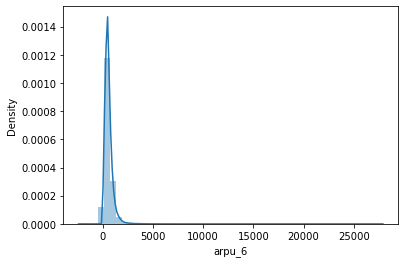

In [60]:
univariate(telecom_HVC.arpu_6)

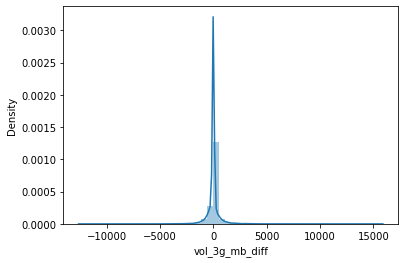

In [61]:
univariate(telecom_HVC.vol_3g_mb_diff)


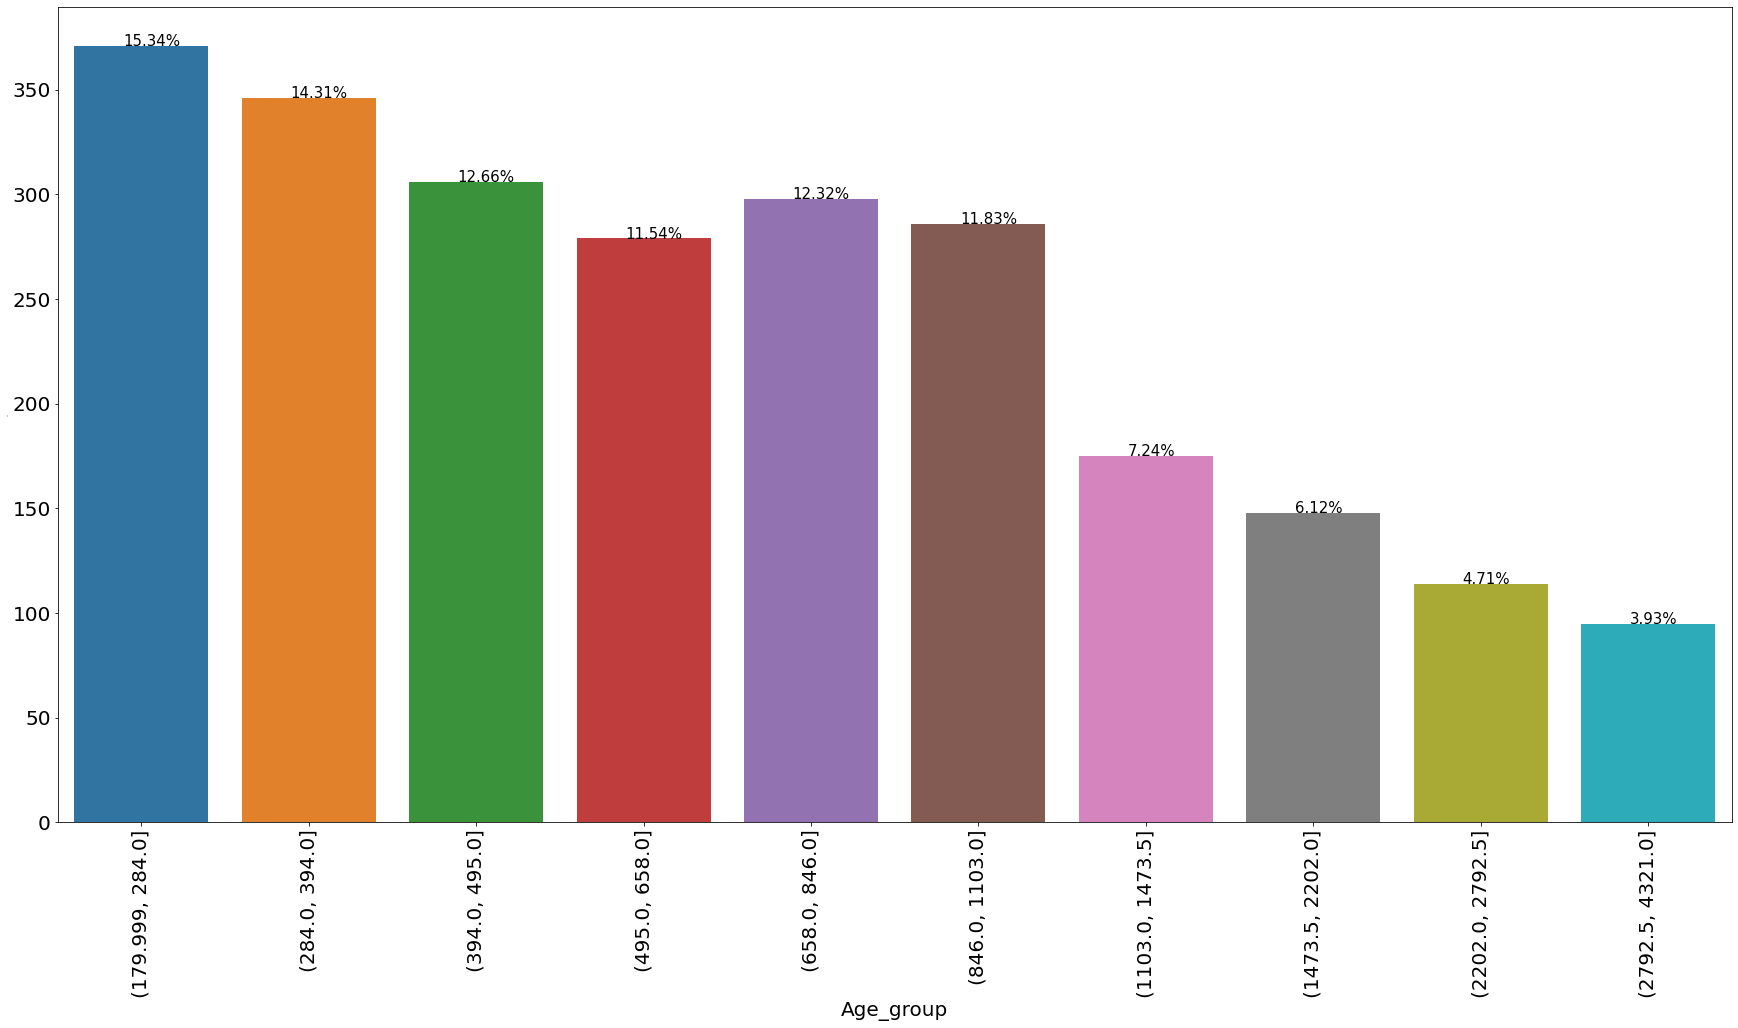

In [62]:
df=telecom_HVC[telecom_HVC['churn']==1]
cnt(df,['Age_group'])


##### We can see that, the percentage of churn is most amoung people who joined recently rather than old customer
##### people with network age between 227 to 284 churn maximum
##### ones with more than 2792 aon dont churn as much

In [63]:
#drop columns with only 1 value in it and mobile number 
telecom_HVC.drop(['Age_group'], axis=1,inplace=True)

## Bivariate EDA

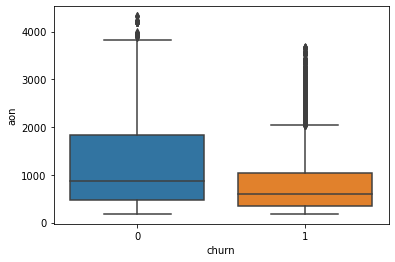

In [64]:
bivariate(telecom_HVC.churn, telecom_HVC.aon)

**Observation**: We can infer from the above boxplots that the churning customers have less age on network than those who are not churning.

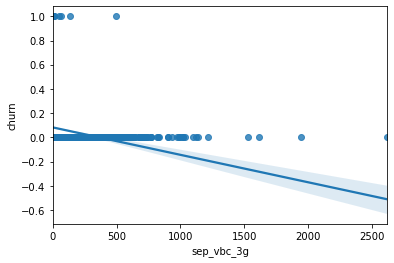

In [65]:
bivariate2(telecom_HVC.sep_vbc_3g, telecom_HVC.churn)

**Obseravtion** : Volume based cost per user has decreased for churned customers in 8th month(Action Phase)

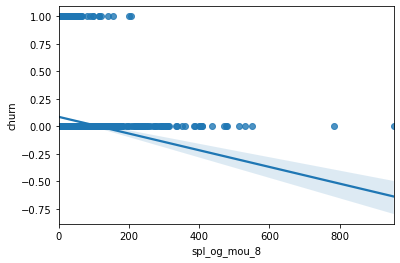

In [66]:
bivariate2(telecom_HVC.spl_og_mou_8, telecom_HVC.churn)


#####  Monthly Subscription columns**

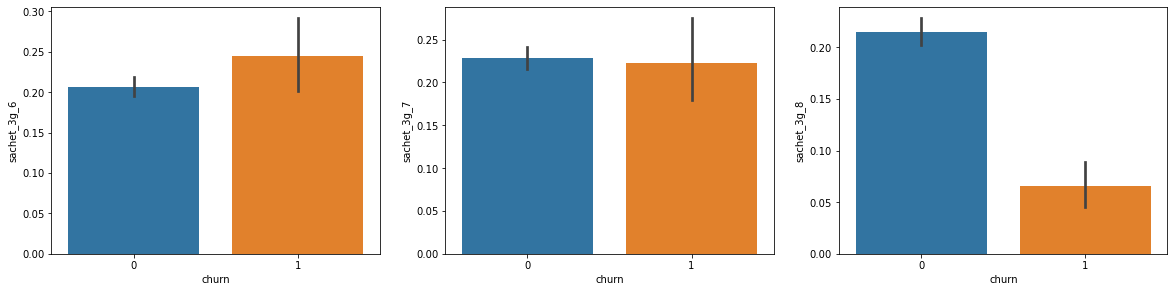

In [67]:
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
sns.barplot(data=telecom_HVC, y='sachet_3g_6',x="churn")

plt.subplot(2,3,2)
sns.barplot(data=telecom_HVC, y= 'sachet_3g_7',x="churn")

plt.subplot(2,3,3)
sns.barplot(data=telecom_HVC, y='sachet_3g_8',x="churn")

plt.show()

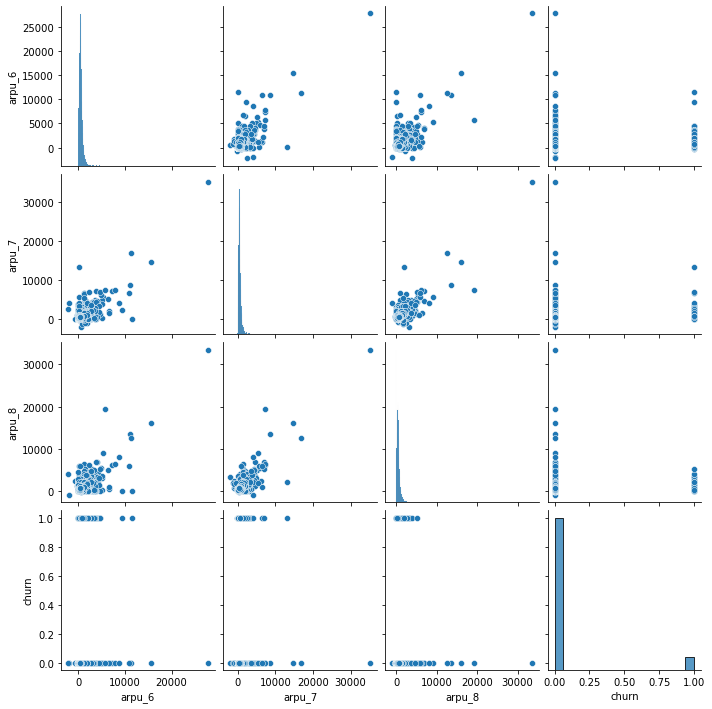

In [68]:
bv = telecom_HVC[['arpu_6','arpu_7', 'arpu_8', 'churn']]
sns.pairplot(bv)
plt.show()

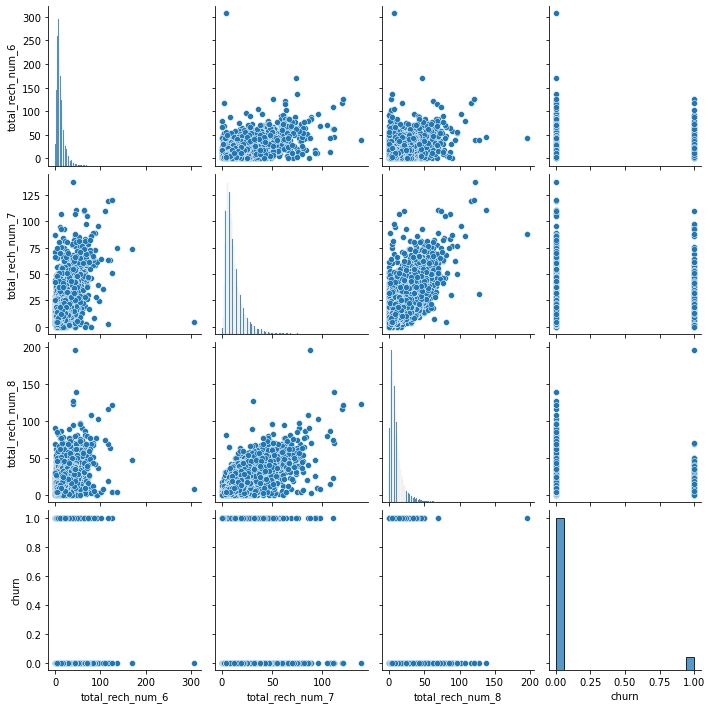

In [69]:
bv = telecom_HVC[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8', 'churn']]
sns.pairplot(bv)
plt.show()

- The above graphs implying that the number recharges cannot solely contribute towards the churn behaviour of a customer
- Since the columns for September are not required for futher processing, these columns can be deleted.

**Observation** : Outgoing calls reduced for churned customers in september(8th) month

In [70]:
# function for boxplots

def boxplot(name):
    plt.figure(figsize =(20,15))
    plt.subplot(2,3,1)
    sns.boxplot(data=telecom_HVC, y=name+'_6',x="churn",hue="churn")

    plt.subplot(2,3,2)
    sns.boxplot(data=telecom_HVC, y=name+'_7',x="churn",hue="churn")

    plt.subplot(2,3,3)
    sns.boxplot(data=telecom_HVC, y=name+'_8',x="churn",hue="churn")

    plt.show()

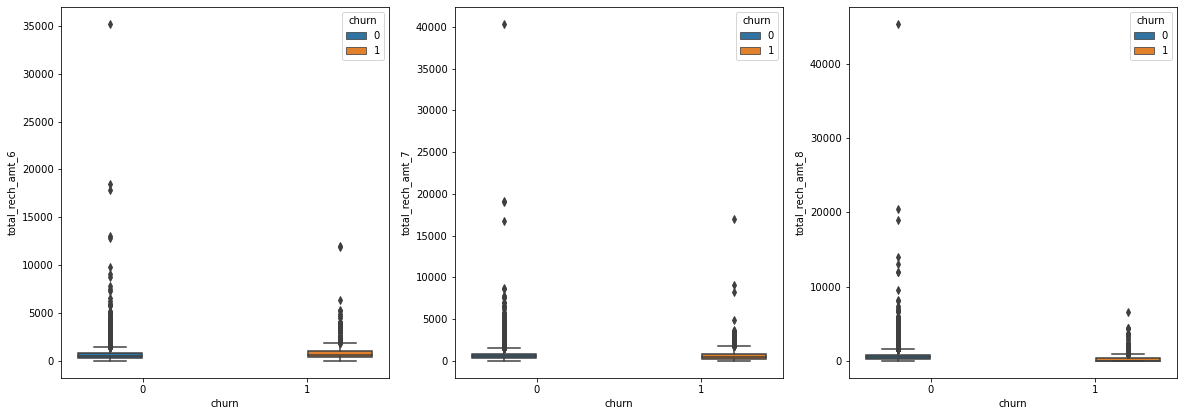

In [71]:
# boxplots for total_rech_amt

boxplot('total_rech_amt')

**2. Average Recharge Amount Data columns**

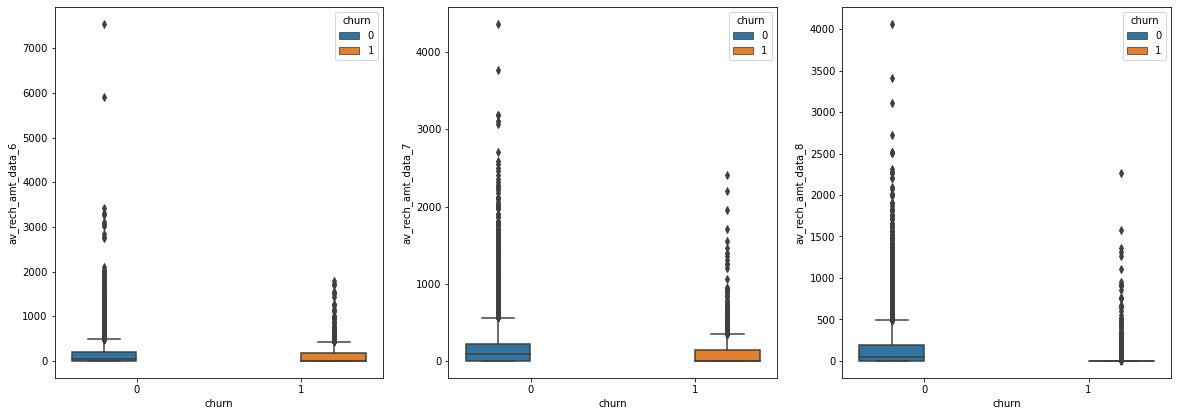

In [72]:
boxplot('av_rech_amt_data')

**Observation** :  We can see that there is a huge drop in average recharge amount for data in the 8th month (action phase) for churned customers.

**3. Average Revenue Per User columns**

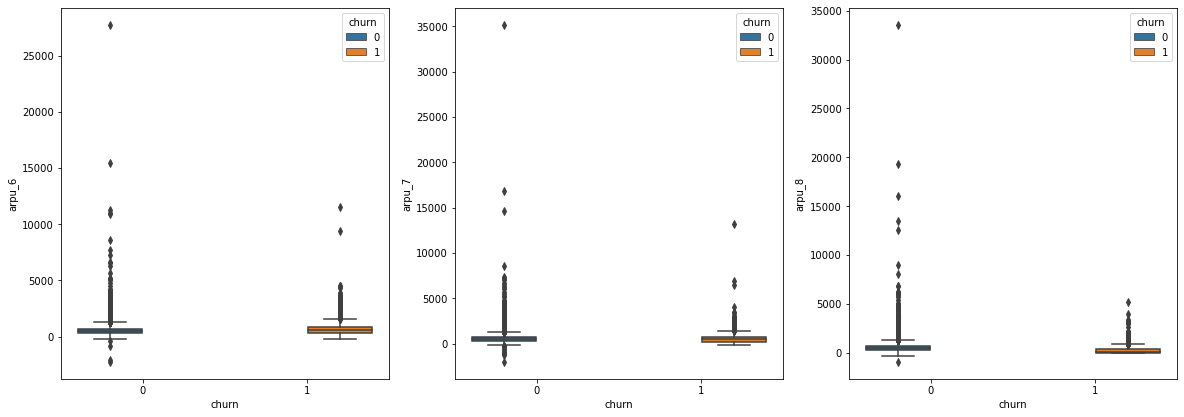

In [73]:
boxplot('arpu')

**Observation**: From the above graphs we can observe that there is significant reduction in the average revenue per user for the churned customers in 8th month. 

**4. Total Recharge Number columns**

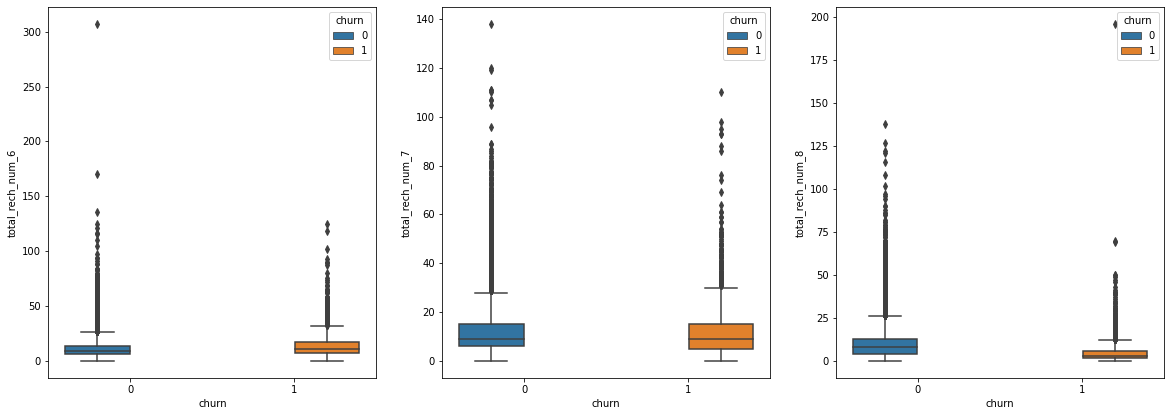

In [74]:
boxplot('total_rech_num')

**Observation**: From the above graphs we can observe that there is a reduction in the number of recharges per user for the churned customers in 8th month. 

**We have a lot of outliers in our graphs so lets first do the outlier treatment by capping all the outliers in our data.**

# OUTLIER TREATMENT

In [75]:
c=list(telecom_HVC.select_dtypes(exclude=object).columns) #selecting only columns with non object data type

In [76]:
## Creating function to identify the non categorical variables 
## using logic that categorical values would have few unique values, we will consider 10 unique values
num=[]
def num_col(na):
    for i in na:
        if len(telecom_HVC[i].unique())>10:
            num.append(i)
    return num

In [77]:
num_col(c) #numeric cols

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [78]:
telecom_HVC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29906 entries, 0 to 29905
Columns: 178 entries, mobile_number to vol_3g_mb_diff
dtypes: float64(144), int64(28), object(6)
memory usage: 40.6+ MB


In [79]:
telecom_HVC.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sep_vbc_3g,churn,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.990600e+04,29906.0,29906.0,29906.0,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,...,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000
mean,7.001206e+09,109.0,0.0,0.0,0.0,558.806269,561.616785,509.247607,261.781639,268.857558,...,8.050003,0.080853,-1.813382,-76.237946,-10.504397,-0.140239,-6.483498,-13.165333,-20.005847,-5.730265
std,6.907405e+05,0.0,0.0,0.0,0.0,460.374956,480.202624,502.346776,459.812130,480.288163,...,52.453432,0.272614,6.757669,418.447953,136.941568,2.216733,78.378934,148.321470,256.356645,625.610187
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
25%,7.000609e+09,109.0,0.0,0.0,0.0,310.568500,310.641000,231.802000,20.010000,18.930000,...,0.000000,0.000000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-60.000000,-21.163750,-2.568750
50%,7.001203e+09,109.0,0.0,0.0,0.0,482.619000,481.813000,427.616000,84.780000,82.890000,...,0.000000,0.000000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001803e+09,109.0,0.0,0.0,0.0,700.290750,699.132750,662.286750,290.895000,290.755000,...,0.000000,0.000000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,2618.570000,1.000000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000


In [80]:
#Capping to remove outliers

def capp(df,col):
    for i in col:
        Q1 = df[i].quantile(0.05)
        df[i][df[i]<=Q1] = Q1
        Q3 = df[i].quantile(0.995)
        df[i][df[i]>=Q3] = Q3
    return df



In [81]:
num.pop(0)# remove mobile number

'mobile_number'

In [82]:
capp(telecom_HVC,num) # capping outliers

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sep_vbc_3g,churn,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.38500,214.816,...,3.58,1,-1.5,-55.0000,0.0,0.0,0.0,0.0,-9.9750,-7.555
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.18000,1349.850,...,0.00,1,2.0,1330.2375,395.0,0.0,0.0,0.0,0.0000,0.000
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.72100,492.223,...,0.00,0,-6.0,-399.0000,-92.0,2.0,-54.0,-19.5,-177.9700,-363.535
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.45300,597.753,...,0.00,0,3.0,78.0000,0.0,0.0,0.0,0.0,0.0000,0.000
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,112.56825,193.897,...,0.00,0,0.0,212.0000,89.5,1.0,89.5,92.0,-0.2300,710.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29901,7000630859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,384.31600,255.405,...,0.33,0,0.0,200.0000,0.0,0.0,0.0,0.0,34.1550,367.885
29902,7000661676,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,328.59400,202.966,...,0.00,0,0.0,-162.5000,-70.0,2.5,-75.0,-20.5,-341.0425,0.000
29903,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,644.97300,455.228,...,0.00,0,-4.0,-691.0000,-174.0,0.0,9.5,9.5,-18.8750,-5.895
29904,7002111859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,312.55800,512.932,...,0.00,0,-3.0,37.0000,52.0,0.5,77.0,77.0,0.7900,671.960


#### THE FINAL DATA HAS 29906 ROWS AND 178 COLUMNS

### Visualization after outlier treatment

**1. Total Recharge Amount columns**

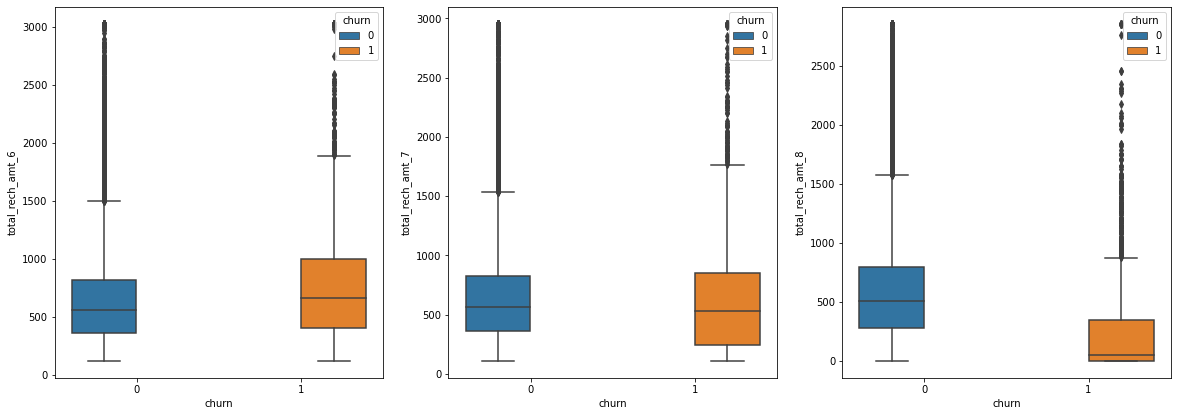

In [83]:
boxplot('total_rech_amt')

**Observation**:  From the above box plots of total recharge amounts we can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

**2. Average Recharge Amount Data columns**

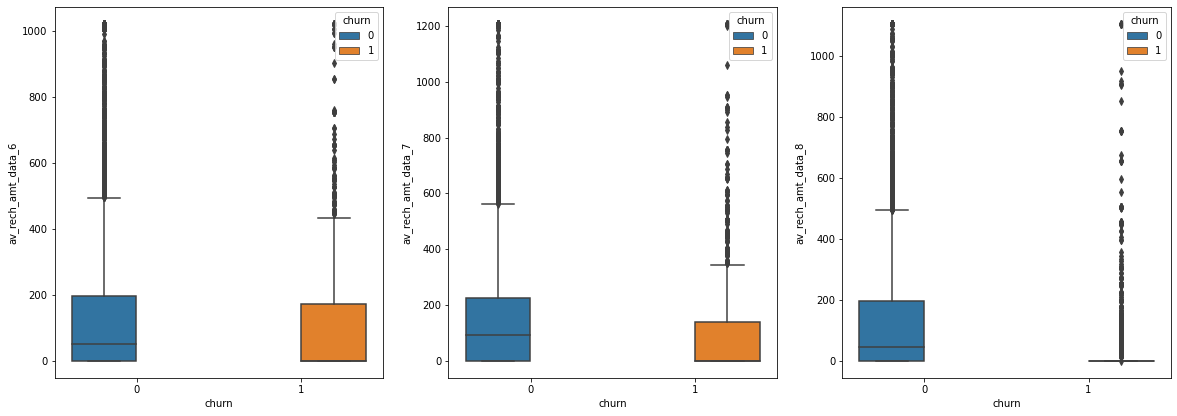

In [84]:
boxplot('av_rech_amt_data')

**Observation** :  We can see that there is a huge drop in average recharge amount for data in the 8th month (action phase) for churned customers.

**3. Average Revenue Per User columns**

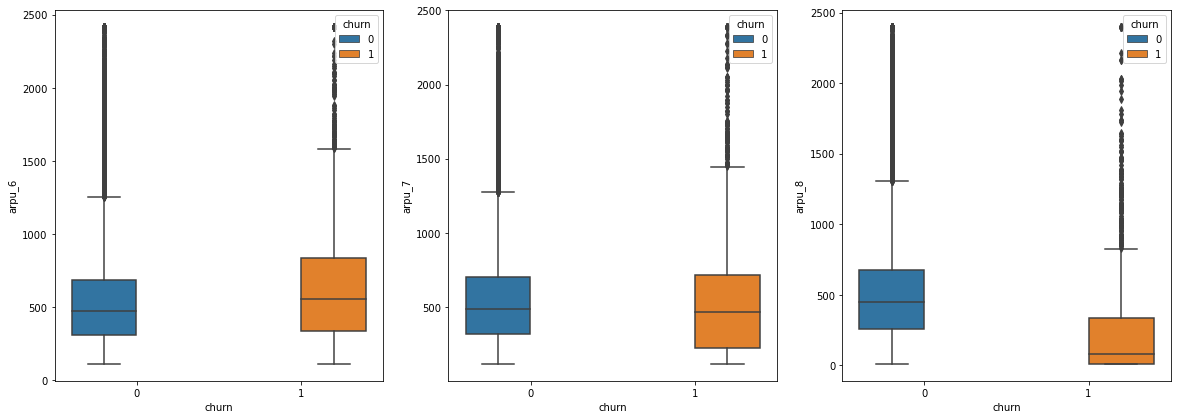

In [85]:
boxplot('arpu')

**Observation**: From the above graphs we can observe that there is significant reduction in the average revenue per user for the churned customers in 8th month. 

**4. Total Recharge Number columns**

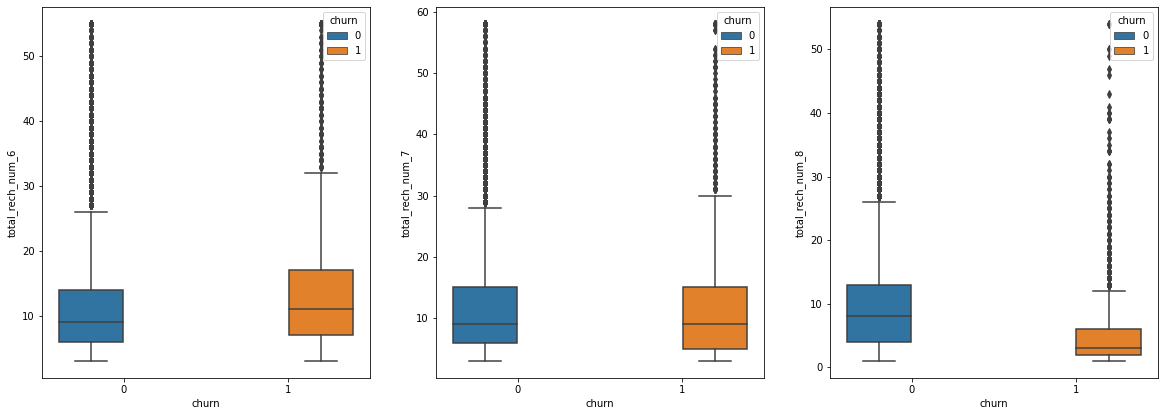

In [86]:
boxplot('total_rech_num')

**Observation**: From the above graphs we can observe that there is a reduction in the number of recharges per user for the churned customers in 8th month. 

#### The number of outliers have significantly reduced

**Observation** : Again we can see a drop in monthly subscription for churned customers in 8th Month.

In [87]:
cat=np.setdiff1d(c,num)

In [88]:
cat

array(['churn', 'circle_id', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'mobile_number',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2o_mou'],
      dtype='<U21')

In [89]:
for i in cat:
    print(i, telecom_HVC[i].unique())

churn [1 0]
circle_id [109]
fb_user_6 [1. 0.]
fb_user_7 [1. 0.]
fb_user_8 [1. 0.]
loc_ic_t2o_mou [0.]
loc_og_t2o_mou [0.]
mobile_number [7000842753 7000701601 7001524846 ... 7001729035 7002111859 7000498689]
monthly_2g_6 [0 2 1 3 4]
monthly_2g_7 [0 1 2 5 4 3]
monthly_2g_8 [0 1 2 5 3 4]
night_pck_user_6 [0. 1.]
night_pck_user_7 [0. 1.]
night_pck_user_8 [0. 1.]
std_ic_t2o_mou_6 [0.]
std_ic_t2o_mou_7 [0.]
std_ic_t2o_mou_8 [0.]
std_og_t2c_mou_6 [0.]
std_og_t2c_mou_7 [0.]
std_og_t2c_mou_8 [0.]
std_og_t2o_mou [0.]


In [90]:
o=list(telecom_HVC.select_dtypes(include=object).columns)

In [91]:
o

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [92]:
for i in o:
    print(i, telecom_HVC[i].unique())

last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014']
last_date_of_month_8 ['8/31/2014']
date_of_last_rech_6 ['6/30/2014']
date_of_last_rech_7 ['7/31/2014']
date_of_last_rech_8 ['8/31/2014']


In [93]:
#drop columns with only 1 value in it and mobile number 
telecom_HVC.drop(['loc_ic_t2o_mou', 'loc_og_t2o_mou','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2o_mou','circle_id','mobile_number','last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8'], axis=1,inplace=True)

In [94]:
telecom_HVC.shape

(29906, 162)

In [95]:
cat=['churn', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8']

In [96]:

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [97]:
telecom_HVC.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sep_vbc_3g,churn,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.00000,29906.000000,...,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000
mean,555.270465,557.604549,502.278049,257.244208,263.731724,230.513177,371.276089,375.274581,333.41953,14.604254,...,6.804923,0.080853,-1.483298,-63.014742,-1.896058,-0.039474,-3.317194,-7.425735,-6.184390,23.298202
std,367.703670,368.971907,395.386143,424.888492,439.304797,412.267087,448.139419,460.654884,430.15471,56.810102,...,34.237637,0.272614,5.282216,331.988784,84.571560,1.642864,61.475645,119.006666,169.188857,427.254666
min,112.568250,114.705000,10.365000,0.000000,0.000000,0.000000,3.190000,2.732500,0.89000,0.000000,...,0.000000,0.000000,-11.500000,-691.000000,-174.000000,-3.000000,-138.500000,-229.000000,-341.042500,-713.346250
25%,310.568500,310.641000,231.802000,20.010000,18.930000,15.660000,80.695000,78.587500,63.25000,0.000000,...,0.000000,0.000000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-60.000000,-21.163750,-2.568750
50%,482.619000,481.813000,427.616000,84.780000,82.890000,65.730000,222.860000,220.300000,183.03500,0.000000,...,0.000000,0.000000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,700.290750,699.132750,662.286750,290.895000,290.755000,240.710000,488.307500,494.437500,438.93750,0.000000,...,0.000000,0.000000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,2415.050650,2387.891425,2397.232300,2717.454750,2777.184500,2717.414750,2750.005000,2894.600500,2820.84425,485.447500,...,325.730500,1.000000,22.000000,1330.237500,476.450000,8.500000,252.000000,581.000000,1113.003750,2857.503500



# SPLIT DATA INTO X and y

In [98]:
# divide data into train and test
X = telecom_HVC.drop("churn", axis = 1)
y = telecom_HVC.churn

# SCALING DATA 

In [99]:
scaler = StandardScaler() #using standard scaler

X[num] = scaler.fit_transform(X[num]) #standardizing data for numeric variables

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,-0.973315,-0.929053,-0.729616,-0.524698,-0.526754,-0.559145,-0.613583,-0.615524,-0.773059,-0.257076,...,-0.142014,-0.094194,-0.003162,0.024142,0.022420,0.024028,0.053960,0.062399,-0.022405,-0.072214
1,1.397642,2.147206,4.792747,-0.469317,-0.475877,-0.432308,0.183325,0.416556,-0.017458,0.028618,...,-0.366519,-0.198759,0.659450,4.196755,4.693099,0.024028,0.053960,0.062399,0.036554,-0.054531
2,-0.480149,-0.177202,-0.922951,0.368211,0.198722,-0.474053,-0.617265,-0.639632,-0.457842,-0.257076,...,-0.084948,-0.198759,-0.855092,-1.012055,-1.065434,1.241434,-0.824451,-0.101460,-1.015365,-0.905408
3,-0.111008,0.108813,0.342663,-0.364417,-0.299619,-0.352625,0.862813,1.131898,1.511041,-0.257076,...,-0.417540,-0.198759,0.848767,0.424765,0.022420,0.024028,0.053960,0.062399,0.036554,-0.054531
4,-1.203985,-0.985749,-0.342233,-0.490217,-0.485028,-0.477691,-0.637906,-0.620680,-0.296479,-0.257076,...,-0.417540,-0.198759,0.280814,0.828399,1.080713,0.632731,1.509846,0.835478,0.035194,1.608147


In [100]:
X.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,...,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,29906.000000,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04
mean,1.660768e-16,2.200102e-16,-9.361126e-17,3.540121e-17,-2.708549e-17,4.205379e-17,-2.138328e-17,7.365353e-18,-4.846877e-17,-4.514249e-18,...,-5.464617e-17,3.635158e-17,-3.136215e-17,4.751841e-18,0.000000,-3.991546e-17,-2.874864e-17,-3.801473e-18,-3.326288e-17,2.328402e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.203985e+00,-1.200381e+00,-1.244154e+00,-6.054495e-01,-6.003489e-01,-5.591449e-01,-8.213789e-01,-8.087363e-01,-7.730593e-01,-2.570757e-01,...,-4.175403e-01,-1.987589e-01,-1.896339e+00,-1.891617e+00,-2.035044,-1.802082e+00,-2.199002e+00,-1.861895e+00,-1.979230e+00,-1.724163e+00
25%,-6.654980e-01,-6.693401e-01,-6.840922e-01,-5.583540e-01,-5.572573e-01,-5.211592e-01,-6.484276e-01,-6.440658e-01,-6.280858e-01,-2.570757e-01,...,-4.175403e-01,-1.987589e-01,-4.764562e-01,-5.481761e-01,-0.367789,-2.803239e-01,-5.990775e-02,-4.417832e-01,-8.853781e-02,-6.054325e-02
50%,-1.975849e-01,-2.054162e-01,-1.888364e-01,-4.059114e-01,-4.116612e-01,-3.997067e-01,-3.311884e-01,-3.364279e-01,-3.496115e-01,-2.570757e-01,...,-4.175403e-01,-1.987589e-01,-3.162047e-03,1.661151e-02,0.022420,2.402776e-02,5.396038e-02,6.239868e-02,3.655379e-02,-5.453092e-02
75%,3.944010e-01,3.835809e-01,4.046965e-01,7.920044e-02,6.151476e-02,2.473395e-02,2.611539e-01,2.586859e-01,2.453065e-01,-2.570757e-01,...,-1.487249e-01,-1.987589e-01,4.701321e-01,4.895270e-01,0.318033,2.402776e-02,5.396038e-02,1.422275e-01,3.655379e-02,-5.453092e-02
max,5.057908e+00,4.960588e+00,4.792747e+00,5.790347e+00,5.721528e+00,6.032359e+00,5.308100e+00,5.469101e+00,5.782725e+00,8.288158e+00,...,6.261082e+00,9.315214e+00,4.445803e+00,4.196755e+00,5.656205,5.198006e+00,4.153213e+00,4.944560e+00,6.615133e+00,6.633638e+00


# DATA PREP FOR MODELLING

#### Before we model, we need to handle the imbalnce in the data


In [101]:
100*y.value_counts(normalize=True) #percentage of churn and non churn

0    91.914666
1     8.085334
Name: churn, dtype: float64

#### There is high imbalance in data, we will use Informed Over Sampling: Synthetic Minority Over-sampling Technique

In [102]:
from imblearn.over_sampling import SMOTE #using SMOTE 
smote = SMOTE(random_state=0)
X_b, y_b = smote.fit_resample(X, y) # fitting the data and resampling

In [103]:
100*y_b.value_counts(normalize=True) #percentage of churn and non churn

1    50.0
0    50.0
Name: churn, dtype: float64

#### After balancing the data we have 50% of churn and 50% of non churn

# TEST TRAIN SPLIT

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.25, random_state = 0)

#### Now that we are done with handling imbalnace we will proceed with modelling

In [105]:
# print shapes of train and test sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41232, 161)
(41232,)
(13744, 161)
(13744,)


#### We see that we have 161 varibales which contribute to churn, we will have to reduce the number of varibales
#### In order to identify this, we will use the PCA technique

# PCA 

In [106]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [108]:
pca.components_

array([[-1.09530636e-01, -1.00809128e-01, -4.94198933e-02, ...,
        -4.36598165e-02, -2.32868341e-02, -1.12742623e-02],
       [ 1.14225768e-01,  1.65356796e-01,  1.97862218e-01, ...,
         6.43299033e-02,  4.09671208e-02,  4.36460995e-02],
       [ 9.71181453e-02,  1.04349059e-01,  5.02131889e-02, ...,
         9.46793875e-03,  1.98011651e-02,  5.28604678e-03],
       ...,
       [ 2.49279967e-03, -1.87132397e-03, -1.99487544e-03, ...,
        -1.99946275e-04,  6.06399881e-04,  5.54639360e-05],
       [-8.23980729e-05, -1.34942114e-03,  3.54935717e-04, ...,
        -1.21676161e-03, -7.19402992e-04,  8.23087632e-04],
       [ 0.00000000e+00,  6.58785477e-17, -3.77144621e-16, ...,
         4.19283705e-17,  1.97522494e-16,  1.73995748e-18]])

In [109]:
pca.explained_variance_ratio_

array([1.15678292e-01, 1.01939615e-01, 6.22090932e-02, 5.32237064e-02,
       4.75367748e-02, 3.72195007e-02, 3.46543453e-02, 3.36950303e-02,
       2.67459797e-02, 2.46587396e-02, 2.00387991e-02, 1.95777526e-02,
       1.76548892e-02, 1.67287694e-02, 1.58638196e-02, 1.45208985e-02,
       1.40971047e-02, 1.28288336e-02, 1.21447929e-02, 1.17685721e-02,
       1.15585806e-02, 1.06311877e-02, 1.02851804e-02, 9.11178552e-03,
       8.77302515e-03, 8.60872386e-03, 8.36360418e-03, 7.99546209e-03,
       7.84386301e-03, 7.51689131e-03, 7.19185645e-03, 6.94284093e-03,
       6.66880235e-03, 6.33751545e-03, 6.10292802e-03, 6.04568676e-03,
       5.88151397e-03, 5.62507691e-03, 5.45726592e-03, 5.32476402e-03,
       5.25600889e-03, 4.96473213e-03, 4.85082803e-03, 4.76969333e-03,
       4.67833495e-03, 4.34559827e-03, 4.20081149e-03, 4.12244874e-03,
       4.04950006e-03, 4.00809435e-03, 3.91771610e-03, 3.75940869e-03,
       3.73636126e-03, 3.46165910e-03, 3.37344842e-03, 3.27911801e-03,
      

<BarContainer object of 161 artists>

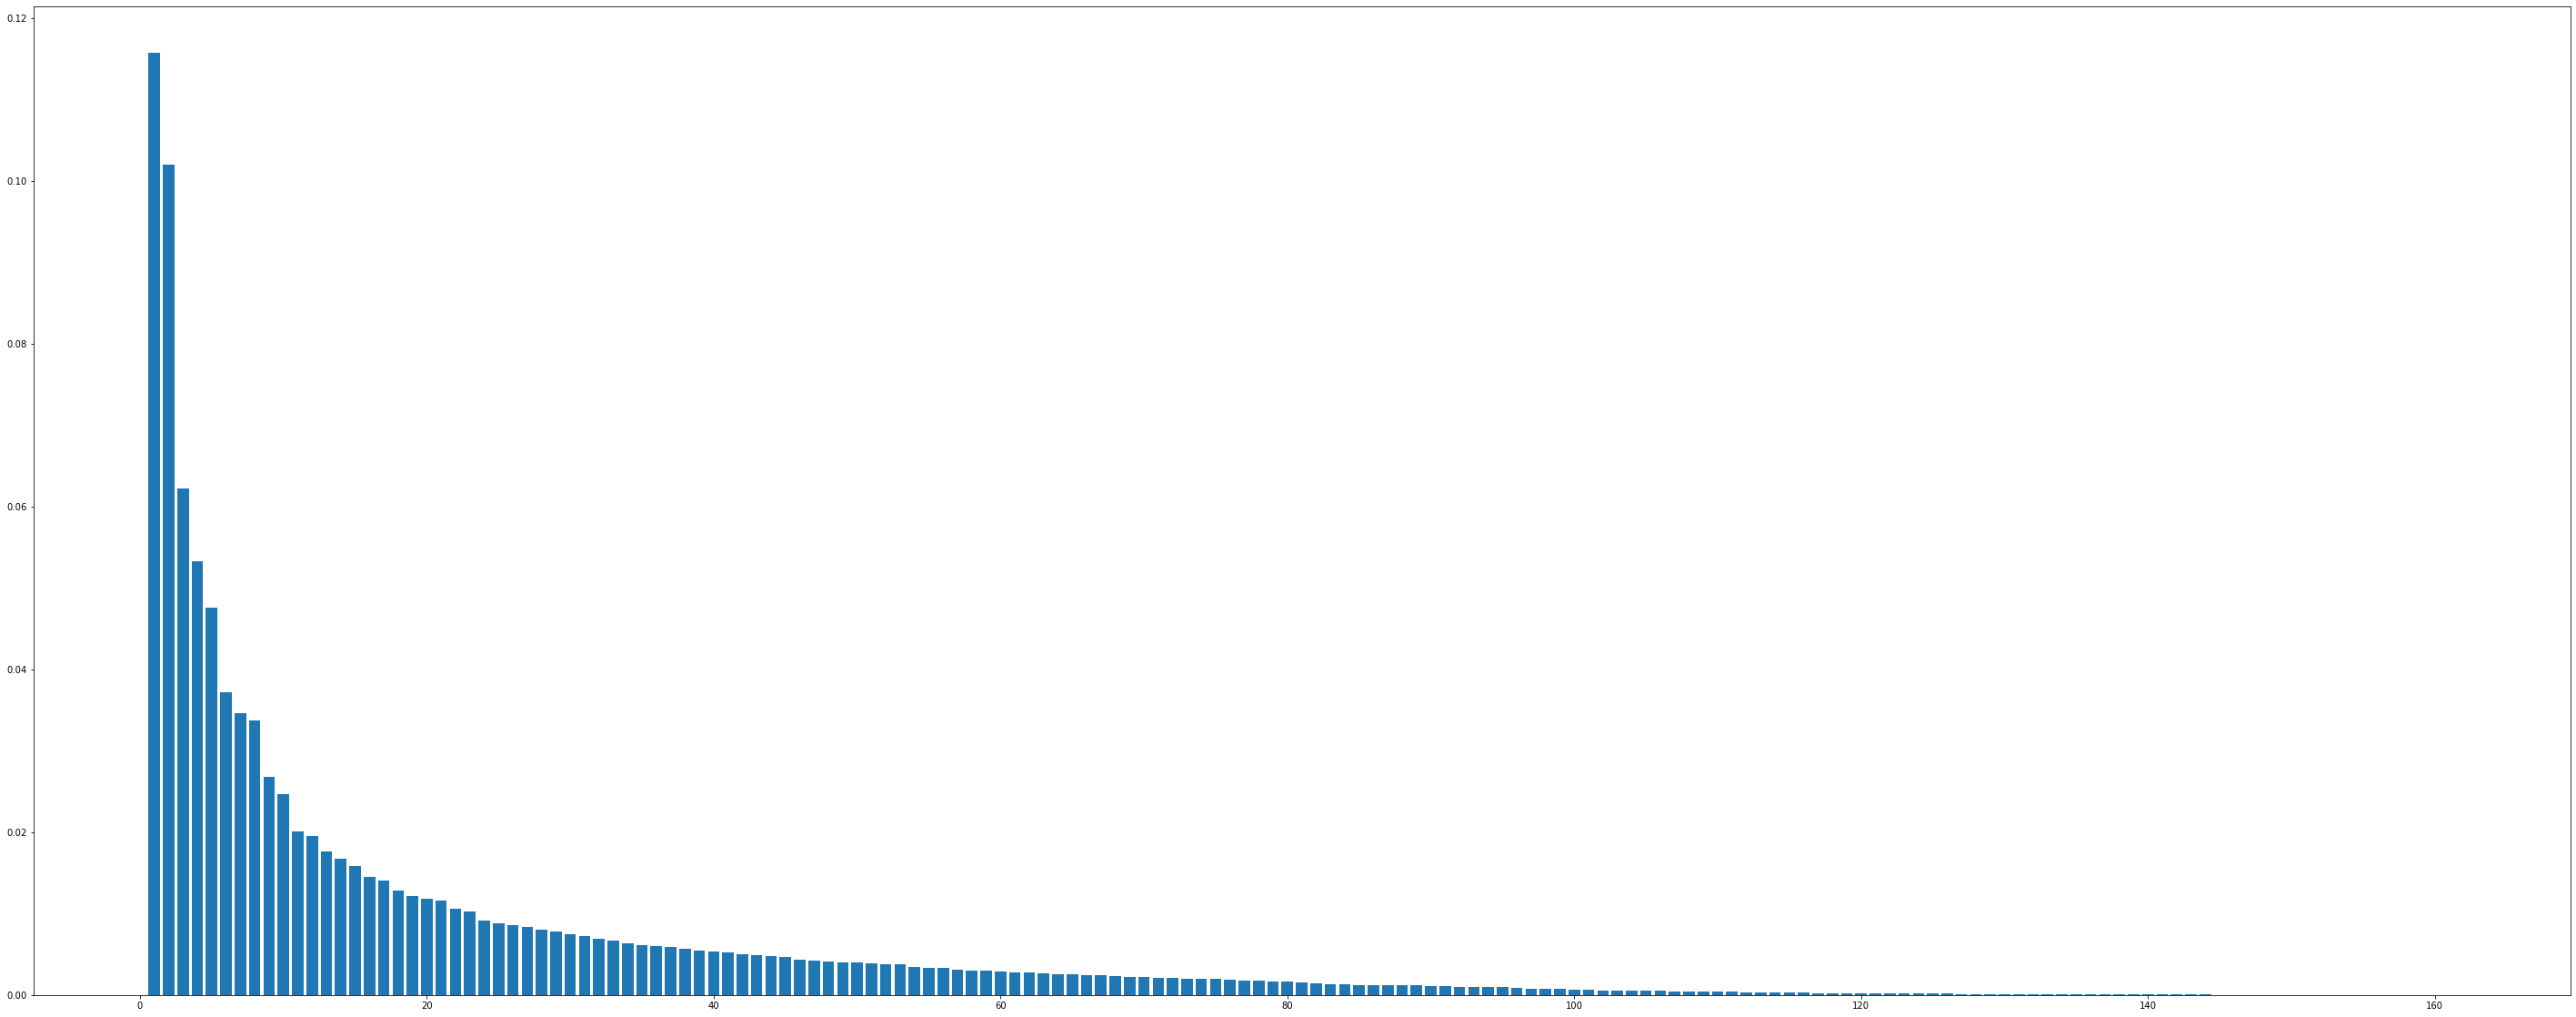

In [110]:
plt.figure(figsize=(50,20))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Making the scree plot

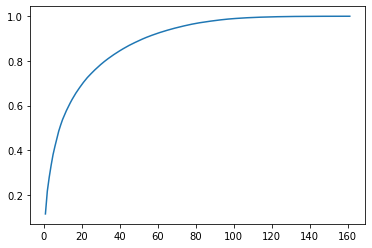

In [111]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

##### PCA with 60 components, as it explains 95% of data

In [112]:
pc60 = PCA(n_components=60, random_state=42)

In [113]:
X_train_PCA = pc60.fit_transform(X_train)

In [114]:
X_train_PCA.shape

(41232, 60)

#### NOw the train set has 60 independent variables



In [115]:
#Applying selected components to the test data - 60 components
X_test_PCA = pc60.transform(X_test)
X_test_PCA.shape

(13744, 60)

# Model 1 : Logistic Regression with PCA

In [116]:
# Fitting Logistic Regression To the training set 

loreg_pca = LogisticRegression(random_state = 0) 
loreg_pca.fit(X_train_PCA, y_train) 

LogisticRegression(random_state=0)

In [117]:
y_train.value_counts()  # checking the value counts fpr churn(1) and non-churn data(0)

0    20654
1    20578
Name: churn, dtype: int64

We have a balanced trained data of target variable

In [118]:
# Predicting the train set result using predict function under LogisticRegression  

y_train_pred_PCA = loreg_pca.predict(X_train_PCA) 

In [119]:
# Predicting the test set result using predict function under LogisticRegression  

y_test_pred_PCA = loreg_pca.predict(X_test_PCA) 

In [120]:
y_train_pred_PCA = pd.DataFrame(y_train_pred_PCA)
y_test_pred_PCA = pd.DataFrame(y_test_pred_PCA)
y_test_pred_PCA.head()

,0
0,1
1,1
2,1
3,0
4,1


In [121]:
# making confusion matrix between train set of Y and predicted value. 

CMtrain_lr_pca = confusion_matrix(y_train, y_train_pred_PCA) 
CMtrain_lr_pca

array([[16825,  3829],
       [ 2819, 17759]], dtype=int64)

In [122]:
# making confusion matrix between the test set of Y and predicted value
  
CMtest_lr_pca = confusion_matrix(y_test, y_test_pred_PCA) 
CMtest_lr_pca

array([[5583, 1251],
       [ 927, 5983]], dtype=int64)

In [123]:
def metrics(confusion):
    
    print("Confusion matrix obtained is \n{val}".format(val=confusion))
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    print("\nAccuracy is {val}%".format(val=round(((TP+TN)/(TP+TN+FP+FN))*100,2)))
    print("\nSensitivity/Recall is = {val}%".format(val=round((TP/(TP+FN))*100,2)))
    print("\nSpecificity is = {val}%".format(val=round((TN/(TN+FP))*100,2)))
    print("\nFalse Positive Rate  is = {val}%".format(val=round((FP/(TN+FP))*100,2)))
    print("\nPrecision is = {val}%".format(val=round((TP/(TP+FP))*100,2)))

In [124]:
# evaluating all the metrics from the confusion matrix of the train dataset

metrics(CMtrain_lr_pca)

Confusion matrix obtained is 
[[16825  3829]
 [ 2819 17759]]

Accuracy is 83.88%

Sensitivity/Recall is = 86.3%

Specificity is = 81.46%

False Positive Rate  is = 18.54%

Precision is = 82.26%


- Accuracy will rightly predicted the model by measuring the number of 'churned' and 'non-churned' cases both while sensitivity is a measure of the number of "churned" cases rightly predicted by the model. Which is our main concern.

- Therefore, Sensitivity is the most imperative metric here. So here our aim would be to maximize the sensitivity while ensuring accuracy and specificity are nt affected much.
- From the train data we get sensitivty of 86.3% which means prediction on train set is very well, lets now check the prediction for test data.

In [125]:
# evaluating all the metrics from the confusion matrix of the test dataset

metrics(CMtest_lr_pca)

Confusion matrix obtained is 
[[5583 1251]
 [ 927 5983]]

Accuracy is 84.15%

Sensitivity/Recall is = 86.58%

Specificity is = 81.69%

False Positive Rate  is = 18.31%

Precision is = 82.71%


# Model 2 : Decision Tree with PCA

In [126]:
X_train_DT_PCA = pd.DataFrame(X_train_PCA)
X_test_DT_PCA = pd.DataFrame(X_test_PCA) 

# Fitting the decision tree with default hyperparameter max_depth is 3

dt_pca1 = DecisionTreeClassifier(max_depth = 3)
dt_pca1.fit(X_train_PCA, y_train)

DecisionTreeClassifier(max_depth=3)

In [127]:
features = list(X_train_DT_PCA.columns[0:])

In [128]:
# Making predictions
y_test_dt_pred_pca_1 = dt_pca1.predict(X_test_DT_PCA)

# Printing classification report
print(classification_report(y_test, y_test_dt_pred_pca_1))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6834
           1       0.79      0.75      0.77      6910

    accuracy                           0.77     13744
   macro avg       0.77      0.77      0.77     13744
weighted avg       0.77      0.77      0.77     13744



In [129]:
# evaluating all the metrics

CMpca_dt_1 = confusion_matrix(y_test,y_test_dt_pred_pca_1)
metrics(CMpca_dt_1)

Confusion matrix obtained is 
[[5465 1369]
 [1756 5154]]

Accuracy is 77.26%

Sensitivity/Recall is = 74.59%

Specificity is = 79.97%

False Positive Rate  is = 20.03%

Precision is = 79.01%


**We have sensitivity lower than the accuracy so we will try to build another decision tree using new hyperparameters to improve sensitivity of the model**

### Using Hyperparameters for Decision Tree

In [130]:
dt_pca2 = DecisionTreeClassifier(max_depth = 5,min_samples_split=150,min_samples_leaf=25,random_state=100,max_leaf_nodes=15,
                                 criterion='entropy')
dt_pca2.fit(X_train_PCA, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15,
                       min_samples_leaf=25, min_samples_split=150,
                       random_state=100)

In [131]:
# Making predictions
y_test_dt_pred_pca_2 = dt_pca2.predict(X_test_DT_PCA)

# Printing classification report
print(classification_report(y_test, y_test_dt_pred_pca_2))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      6834
           1       0.77      0.79      0.78      6910

    accuracy                           0.78     13744
   macro avg       0.78      0.78      0.78     13744
weighted avg       0.78      0.78      0.78     13744



In [132]:
# Matrics evaluation

CMpca_dt_2 = confusion_matrix(y_test, y_test_dt_pred_pca_2)
metrics(CMpca_dt_2)

Confusion matrix obtained is 
[[5252 1582]
 [1475 5435]]

Accuracy is 77.76%

Sensitivity/Recall is = 78.65%

Specificity is = 76.85%

False Positive Rate  is = 23.15%

Precision is = 77.45%


**Observation** : By tuning the hyperparameters with maximum depth of 5, we have obtained a good decision tree model.

In [133]:
# importing the required packages for drawing a  decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import io

# function for drawing a decision tree
def draw_dt(dt,features):
    dot_data = io.StringIO()  
    export_graphviz(dt, out_file = dot_data,feature_names = features, filled = True,rounded = True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(Image(graph.create_png()))

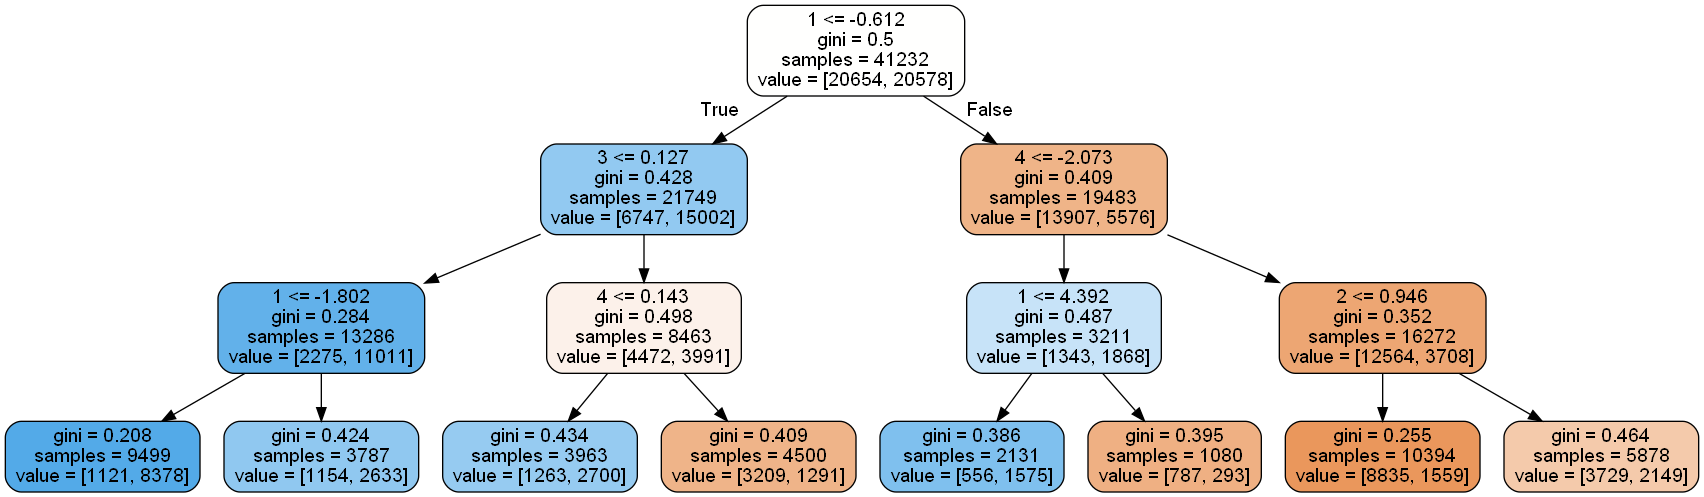

In [134]:
# ploting a decision tree with depth 3
draw_dt(dt_pca1,features)

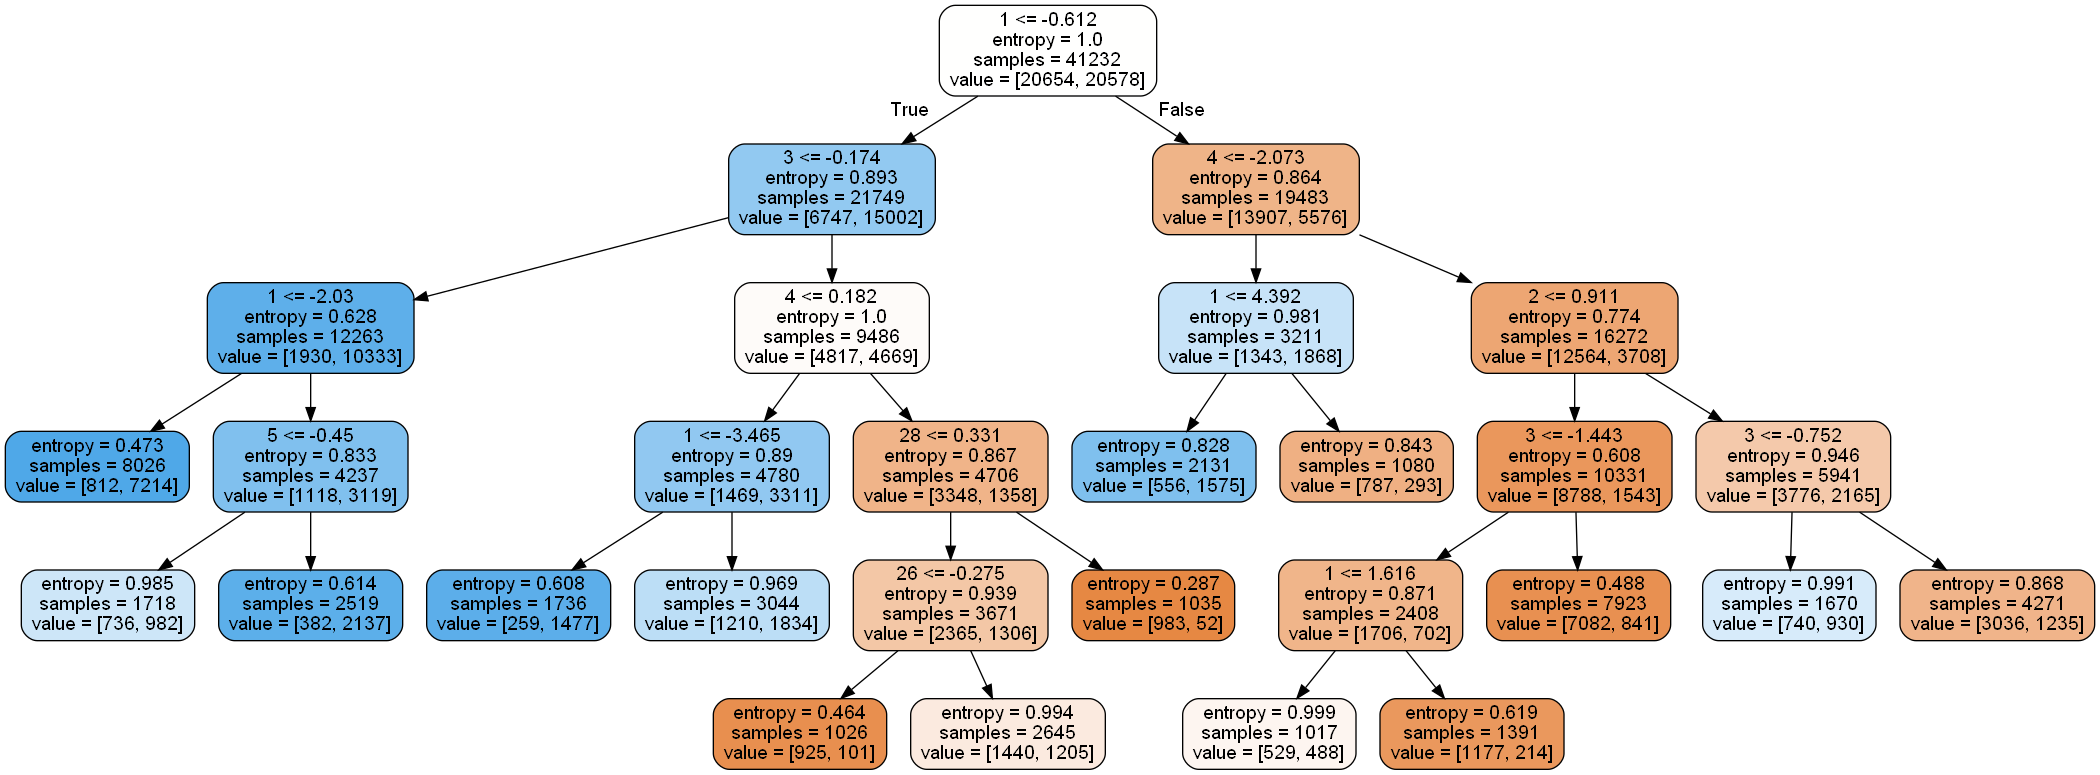

In [135]:
# plotting a decision tree with depth 5
draw_dt(dt_pca2,features)

# Model 3 : Random Forest with PCA

In [136]:
# Random Forest
rf = RandomForestClassifier()

# fitting
rf.fit(X_train_PCA,y_train)

RandomForestClassifier()

In [137]:
# predictions for train dataset

rf_Ypred = rf.predict(X_train_PCA)
print(classification_report(y_train,rf_Ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20654
           1       1.00      1.00      1.00     20578

    accuracy                           1.00     41232
   macro avg       1.00      1.00      1.00     41232
weighted avg       1.00      1.00      1.00     41232



In [138]:
# predictions for test dataset

rf_Ypred_test = rf.predict(X_test_PCA)
print(classification_report(y_test, rf_Ypred_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6834
           1       0.94      0.97      0.95      6910

    accuracy                           0.95     13744
   macro avg       0.95      0.95      0.95     13744
weighted avg       0.95      0.95      0.95     13744



In [139]:
CMrf_pca = confusion_matrix(y_test, rf_Ypred_test)
metrics(CMrf_pca)

Confusion matrix obtained is 
[[6412  422]
 [ 215 6695]]

Accuracy is 95.37%

Sensitivity/Recall is = 96.89%

Specificity is = 93.82%

False Positive Rate  is = 6.18%

Precision is = 94.07%


- Since we have obtained an excellent sensitivity and accuracy here, there is no need of performing hyperparameters tuning in this model.

### **Conclusion** : Looking at the outcomes of all the three models( Logistic, Decision and Random Forest) we can say that the Random Forest is the best model for predictions because it has very well described the 'churned' cases keeping all the others metrics at its best.

# Model 4 - Boosting without PCA

In [140]:
# Original train and test without PCA
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41232, 161)
(41232,)
(13744, 161)
(13744,)


##### this is our original data, has 161 columns

In [141]:
def calculate_metrics(confusion):
    
    print("Confusion matrix obtained is \n{val}".format(val=confusion))
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    print("\nAccuracy {val}%".format(val=round(((TP+TN)/(TP+TN+FP+FN))*100,2)))
    print("\nSensitivity/Recall/True Positive Rate {val}%".format(val=round((TP/(TP+FN))*100,2)))
    print("\nSpecificity {val}%".format(val=round((TN/(TN+FP))*100,2)))
    print("\nFalse Positive Rate {val}%".format(val=round((FP/(TN+FP))*100,2)))
    print("\nPrecision {val}%".format(val=round((TP/(TP+FP))*100,2)))


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
# base estimator: a weak learner with max_depth=6
shallow_tree = DecisionTreeClassifier(max_depth=6, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# prediction on test dataset
y_pred = shallow_tree.predict(X_test)
boost_1 = confusion_matrix(y_test, y_pred)
calculate_metrics(boost_1)

Confusion matrix obtained is 
[[6224  610]
 [ 909 6001]]

Accuracy 88.95%

Sensitivity/Recall/True Positive Rate 86.85%

Specificity 91.07%

False Positive Rate 8.93%

Precision 90.77%


In [143]:
# adaboost with the tree as base estimator

estimators = list(range(1, 30, 3)) #increase the number of trees from 1 to 30 with a step of 3 in the lines:

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) 
    TP = cm[1,1]
    FN = cm[1,0]
    abc_scores.append(round((TP/(TP+FN))*100,2))
    print("\n\nThe value for all the relevant metrics for number of estimators {} \n".format(n_est))
    calculate_metrics(cm)



The value for all the relevant metrics for number of estimators 1 

Confusion matrix obtained is 
[[6224  610]
 [ 909 6001]]

Accuracy 88.95%

Sensitivity/Recall/True Positive Rate 86.85%

Specificity 91.07%

False Positive Rate 8.93%

Precision 90.77%


The value for all the relevant metrics for number of estimators 4 

Confusion matrix obtained is 
[[6235  599]
 [ 548 6362]]

Accuracy 91.65%

Sensitivity/Recall/True Positive Rate 92.07%

Specificity 91.24%

False Positive Rate 8.76%

Precision 91.39%


The value for all the relevant metrics for number of estimators 7 

Confusion matrix obtained is 
[[6342  492]
 [ 407 6503]]

Accuracy 93.46%

Sensitivity/Recall/True Positive Rate 94.11%

Specificity 92.8%

False Positive Rate 7.2%

Precision 92.97%


The value for all the relevant metrics for number of estimators 10 

Confusion matrix obtained is 
[[6392  442]
 [ 357 6553]]

Accuracy 94.19%

Sensitivity/Recall/True Positive Rate 94.83%

Specificity 93.53%

False Positive Rate 6.47%

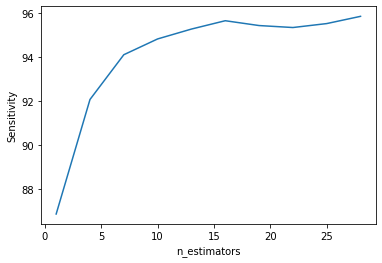

In [144]:
# plot test scores and n_estimators

plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('Sensitivity')

plt.show()

The sensitivity is max around 16

The value for all the relevant metrics for number of estimators 16 

Confusion matrix obtained is 
[[6495  339]
 [ 297 6613]]

Accuracy 95.37%

Sensitivity/Recall/True Positive Rate 95.7%

Specificity 95.04%

False Positive Rate 4.96%

Precision 95.12%


-------------------------

The value for all the relevant metrics for number of estimators 25 

Confusion matrix obtained is 
[[6454  380]
 [ 297 6613]]

Accuracy 95.07%

Sensitivity/Recall/True Positive Rate 95.7%

Specificity 94.44%

False Positive Rate 5.56%

Precision 94.57%

-------------------------------

The value for all the relevant metrics for number of estimators 28 

Confusion matrix obtained is 
[[6496  338]
 [ 296 6614]]

Accuracy 95.39%

Sensitivity/Recall/True Positive Rate 95.72%

Specificity 95.05%

False Positive Rate 4.95%

Precision 95.14%


##### OF all the estimators 16, 25 and 28 has the best sensitivity without compramising other matrices 



In [145]:
# base estimator: a weak learner with max_depth = 11
shallow_tree2 = DecisionTreeClassifier(max_depth = 11, random_state = 100)
# fit the shallow decision tree 
shallow_tree2.fit(X_train, y_train)

# test error
boost_2 = shallow_tree2.predict(X_test)
cm = confusion_matrix(y_test, boost_2)
calculate_metrics(cm)

Confusion matrix obtained is 
[[6171  663]
 [ 443 6467]]

Accuracy 91.95%

Sensitivity/Recall/True Positive Rate 93.59%

Specificity 90.3%

False Positive Rate 9.7%

Precision 90.7%


#### TUNE PARAMETERS

In [146]:
# adaboost with the tree as base estimator

estimators = list(range(1, 30, 3)) #increase the number of trees from 1 to 30 with a step of 3 in the lines:

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree2, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) 
    TP = cm[1,1]
    FN = cm[1,0]
    abc_scores.append(round((TP/(TP+FN))*100,2))
    print("\n\nThe value for all the relevant metrics for number of estimators {} \n".format(n_est))
    calculate_metrics(cm)



The value for all the relevant metrics for number of estimators 1 

Confusion matrix obtained is 
[[6163  671]
 [ 441 6469]]

Accuracy 91.91%

Sensitivity/Recall/True Positive Rate 93.62%

Specificity 90.18%

False Positive Rate 9.82%

Precision 90.6%


The value for all the relevant metrics for number of estimators 4 

Confusion matrix obtained is 
[[6209  625]
 [ 416 6494]]

Accuracy 92.43%

Sensitivity/Recall/True Positive Rate 93.98%

Specificity 90.85%

False Positive Rate 9.15%

Precision 91.22%


The value for all the relevant metrics for number of estimators 7 

Confusion matrix obtained is 
[[6237  597]
 [ 398 6512]]

Accuracy 92.76%

Sensitivity/Recall/True Positive Rate 94.24%

Specificity 91.26%

False Positive Rate 8.74%

Precision 91.6%


The value for all the relevant metrics for number of estimators 10 

Confusion matrix obtained is 
[[6347  487]
 [ 360 6550]]

Accuracy 93.84%

Sensitivity/Recall/True Positive Rate 94.79%

Specificity 92.87%

False Positive Rate 7.13%

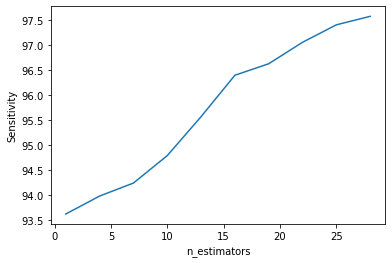

In [147]:
# plot test scores and n_estimators

plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('Sensitivity')

plt.show()

In [148]:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree2, 
    n_estimators = 23)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) 
    TP = cm[1,1]
    FN = cm[1,0]
    abc_scores.append(round((TP/(TP+FN))*100,2))
    print("\n\nThe value for all the relevant metrics for number of estimators {} \n".format(n_est))
    calculate_metrics(cm)



The value for all the relevant metrics for number of estimators 28 

Confusion matrix obtained is 
[[6480  354]
 [ 182 6728]]

Accuracy 96.1%

Sensitivity/Recall/True Positive Rate 97.37%

Specificity 94.82%

False Positive Rate 5.18%

Precision 95.0%


The value for all the relevant metrics for number of estimators 25 

Confusion matrix obtained is 
[[6442  392]
 [ 175 6735]]

Accuracy 95.87%

Sensitivity/Recall/True Positive Rate 97.47%

Specificity 94.26%

False Positive Rate 5.74%

Precision 94.5%

### shallow_tree estimator 28 

The value for all the relevant metrics for number of estimators 28

Confusion matrix obtained is [[6496 338] [ 296 6614]]

Accuracy 95.39%

Sensitivity/Recall/True Positive Rate 95.72%

Specificity 95.05%

False Positive Rate 4.95%

Precision 95.14%

#### For shallow_tree 2 estimator 25 has best model
### Overall best model is shallow_tree 2 estimator 25, depth 11.

In [149]:
features = list(X_train.columns[0:]) #get the column names

<AxesSubplot:>

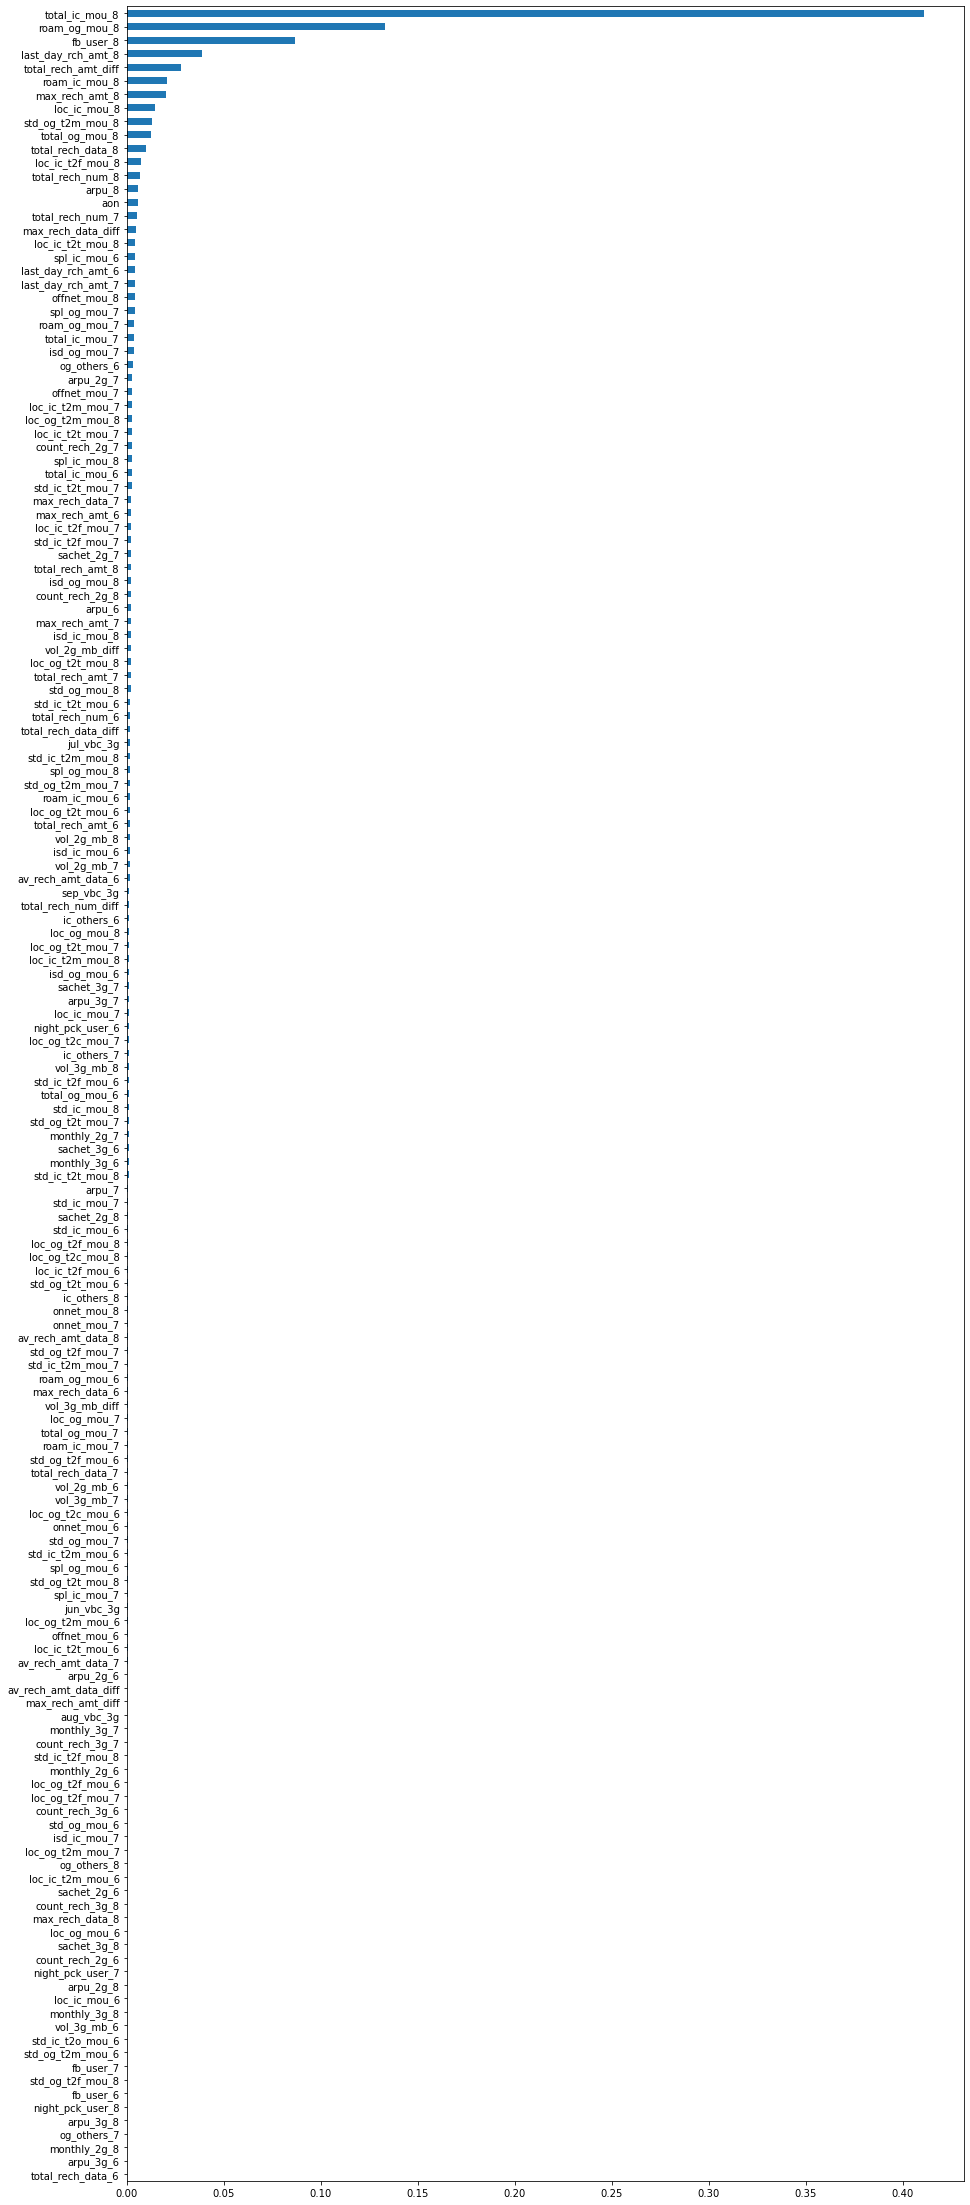

In [150]:
#plot feature importance for shallow tree2
plt.figure(figsize=(15,40))
feat_importances = pd.Series(shallow_tree2.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

#### The graph above suggest that the top features ranked in order of importance as produced by our Boosting Algorithm . 
Most of the features belong to month 8, it is clear that what happens in the action phase has a direct impact on the customer churn 


##### Top 20 features are:
    
- total_ic_mou_8 -- Total incoming minutes of usage in month 8
- roam_og_mou_8 -- outgoing roaming calls minutes of usage in month 8
- fb_user_8 -- services of Facebook and similar social networking sites for month 8
- last_day_rch_amt_8 -- last (most recent) recharge amount in month 8
- total_rech_amt_data_8 -- total recharge amount for data in month 8
- roam_ic_mou_8 -- incoming roaming calls minutes of usage in month 8
- max_rech_data_8 -- maximum data recharge (MB) in month 8
- loc_ic_mou_8 -- local incoming minutes of usage in month 8
- std_og_t3m_mou_8 -- standard outgoing operator T to other operator mobile
- total_og_mou_8-- total outgoing calls for 8th month
- total_rech_data_8 -- total data recharge (MB) in month 8
- loc_ic_t2t_mou_8 -- local incoming calls from  Operator T to fixed lines of T minutes of usage in month 8
- total_rech_num_8 -- total number of recharges done in the month 8
- arpu_8 -- average revenue per user in month 8
- aon -- Age on network - number of days the customer is using the operator T network
- total_rech_num_8 -- total number of recharges done in the month 7
- max_rech_data_amt_8 -- maximum recharge and data amount in month 8
- loc_ic_t2t_mou_8 -- local incoming calls Operator T to fixed lines of T minutes of usage in month 8
- spl_ic_mou_7 -- Special incoming call for the month of 7
- last_day_rch_amt_6 -- last (most recent) recharge amount in month 6
- last_day_rch_amt_6 -- last (most recent) recharge amount in month 7

We can say that, we need to pay attention to activities in month 8 or the active phase, especially mou and recharge and data details and age of network

# Business sugestion



In order to have better profit, it is important to retain the customers than attract new customer, as it costs 5to10 times more to attract new customer

The best stratergies would be
- Identify the customers with churn posibilty by concentrating on 8th month features
- Pay attention to the activity of customer
- Make sure the plan rates are either lesser or in par with competitors
- If a customer has high churn rate, maybe we could offer special offers without losing out on profit
- Keep the special plans active for customer who have recently joined 
- Contact high rate churn customer and ask them about experience and provide offers and coupouns 
- Reduce the roaming costs
- Promote same network calls, by offere same network call discounts 